<center> <h1>UVOD U PODATKOVNU ZNANOST</h1>


<h3>Seminar - Analiza filmova iz TMDb baze podataka </h3> 


<hr>

#### <h3>1.&emsp;Uvod</h3> 


<hr>
<p style='text-align: justify'>
U ovom seminarskom radu obraditi će se analiza <a href='https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv'>skupa podataka</a> koji sadrži informacije o oko 10 000 filmova prikupljenih iz baze podataka filmova i serija pod nazivom <a href='https://www.themoviedb.org/'>The Movie Database</a>. Prvi korak analize je predobrada i čišćenje skupa podataka na način da se uklone podaci koji nisu potrebni ili su nepotpuni. Zatim će se realizirati eksplorativna analiza skupa podataka gdje će se obraditi neka od ključnih pitanja kao što su koliki je ukupan broj objavljenih filmova po godinama, top 10 kompaniji s najvećim brojem objavljenih filmova, popis najprofitiranijih filmova i drugo, te će se dobiveni rezultati analiza vizualizirati pomoću vizualizacijskih grafova. 

Također, skup podataka sadrži nestrukturirane tekstualne podatke kao što su kratki sadržaji filmova, pa će se obraditi analiza npr. najučestalijih riječi u tekstovima, najučestalijih imenica i drugo. Pomoću testiranja hipoteza odgovoriti će se na pitanje o broju objavljenih filmova u 2013. i 2014. godini, odnosno da li prate istu distribuciju. Iduća analiza je predviđanje broja objavljenih filmova do 2023. godine pomoću procedure za prognoziranje vremenskih nizova. Da li je film dobar ili loš odrediti će se klasifikacijom, a kolika je popularnost filma regresijom, te će se usporediti različiti modeli na temelju metrike točnosti. Na temelju nekoliko mjera centralnosti mreže suradnje glumaca po svakom filmu koja se definira listom uloga svakog filma, odrediti će se najvažniji čvorovi u mreži od prvih 1000 filmova u skupu podataka.
</p>

In [ ]:
# biblioteke
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import string

In [ ]:
%cd /content/drive/MyDrive/UPZ_seminar

/content/drive/MyDrive/UPZ_seminar


In [ ]:
# Učitavanje skupa podataka u podatkovni okvir
movies_df = pd.read_csv('TMDB_movies_dataset.csv')

In [ ]:
# Prikaz prvih 5 redaka podatkovnog okvira
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [ ]:
# Broj stupaca i redaka u skupu podataka
print(f'U skupu podataka nalazi se {movies_df.shape[0]-1} redaka i {movies_df.shape[1]} stupac.')

U skupu podataka nalazi se 10865 redaka i 21 stupac.


> Skup podataka sadrži ukupno `10866` redaka s informacijama o filmovima, te `21` stupac gdje svaki stupac sadrži neku značajku vezanu za filmove. Popis značajki koje skup sadrži je sljedeći:
<div>
  <ul>
    <li>id - jedinstvena oznaka filma</li>
    <li>imdb_id - jedinstvena oznaka filma na IMDB-u</li>
    <li>budget - proračun filma u [$]</li>
    <li>popularity - popularnost filma</li>
    <li>revenue - ostvareni prihod filma u [$]</li>
    <li>original_title - originalni naslov filma</li>
    <li>cast - glavni i sporedni glumci</li>
    <li>homepage - poveznica na stranicu filma</li>
    <li>director - redatelj filma</li>
    <li>tagline - slogan filma</li>
    <li>keywords - ključne riječi vezane za film</li>
    <li>overview - kratak opis filma</li>
    <li>runtime - vrijeme trajanja filma u [min]</li>
    <li>genres - žanrovi filma</li>
    <li>production_companies - produkcijska kuća filma</li>
    <li>release_date - datum objave filma</li>
    <li>vote_count - zbroj ocjena filma</li>
    <li>vote_average - prosječna ocjena filma</li>
    <li>release_year - godina objave filma</li>
    <li>budget_adj</li>
    <li>revenue_adj</li>
  </ul>
</div>

#### <h3>2.&emsp;Kontrola i čišćenje podataka</h3> 


<hr>

Potrebno je provjeriti da li postoje sve valjane vrijednosti u svakom retku s informacijama o filmovima. Važno je osigurati skup podataka čistim, te definirati tipove podataka ovisno o metodama analiza koje se žele koristiti. Kako bi se navedeno omogućilo, potrebno je riješiti sljedeće:
<ol>
  <li>provjeriti da li postoje NaN vrijednosti,</li>
  <li>provjeriti da li postoje duplikati,</li>
  <li>provjeriti i promjeniti tipove podataka stupaca,</li>
  <li>provjeriti ostale vrijednosti i popuniti NaN vrijednosti,</li>
  <li>izbrisati nepotrebne stupce.</li>
  
</ol>


<h4>1. Provjera NaN vrijednosti</h4>

<hr>

>Za svaki stupac prikazan je zbroj NaN vrijednosti gdje se može vidjeti da `9` stupaca sadrži NaN vrijednosti.

In [ ]:
# Broj NaN vrijednosti po stupcu
movies_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<h4>2. Provjera duplih redaka</h4>

<hr>

> Postoji samo jedan dupli redak u skupu podataka koji se može izbrisati.

In [ ]:
# Broj duplih redaka u skupu podataka
movies_df.duplicated().sum()

1

In [ ]:
# Brisanje duplikata
movies_df = movies_df.drop_duplicates()

In [ ]:
print('Nakon brisanja duplog retka, u skupu podataka se nalazi', movies_df.shape[0]-1, 'redaka.')

Nakon brisanja duplog retka, u skupu podataka se nalazi 10864 redaka.


<h4> 3. Provjera tipova podataka</h4>

<hr>

> Stupci su definirani tipovima podataka kao što su `object`, `int` i `float`. Tip koji se može promjeniti odnosi se na stupac `release_date`, a postaviti će se u tip podatka `datetime`.

In [ ]:
# Tipovi podataka po stupcu
movies_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [ ]:
# Promjena tipa podatka u datetime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

In [ ]:
# Tipovi podataka nakon promjene
movies_df['release_date'].dtypes

dtype('<M8[ns]')

<h4> 4. Provjera ostalih vrijednosti i popunjavanje NaN vrijednosti</h4>

<hr>

> Iz opisne statistike može se vidjeti da postoje nepravilnosti. Minimalna vrijednost za proračun, ostvareni prihod i vrijeme trajanja filma iznosi `0`. Zbog toga će se izbrisati svi retci koji sadrže tu vrijednost za neku od tih značajki.

In [ ]:
# Opisna statistika
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
# Lista stupaca za provjeru
rows = ['budget', 'revenue', 'runtime']

In [ ]:
# Promjena vrijednosti '0' u srednju vrijednost za stupce u listi
movies_df[rows] = movies_df[rows].replace(0, np.mean(movies_df[rows]))

<h4>5. Brisanje nepotrebnih stupaca</h4>

<hr>

> Postoje stupci u skupu podataka koji nisu od važnosti za analizu podataka, pa ih se može izbrisati.

In [ ]:
# Lista stupaca koji će se izbrisati
columns = ['imdb_id', 'homepage', 'tagline','budget_adj', 'revenue_adj']

In [ ]:
# Brisanje nepotrebnih stupaca
movies_df = movies_df.drop(columns, axis=1)

In [ ]:
# Prikaz skupa podataka nakon brisanja
movies_df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


In [ ]:
# Izdvajanje mjeseca u novi stupac release_month
movies_df['release_month'] = pd.DatetimeIndex(movies_df['release_date']).month

In [ ]:
# Izdvajanje mjeseca u novi stupac release_day
movies_df['release_day'] = pd.DatetimeIndex(movies_df['release_date']).day

In [ ]:
# Prikaz skupa podataka s novim stupcima
movies_df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,release_month,release_day
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6,9
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,5,13


#### <h3>3.&emsp;Eksplorativna analiza skupa podataka i vizualizacija</h3> 


<hr>
<p style="text-align: justify;"> Može se napraviti nekoliko analiza ovisno o ukupnom broju filmova, a koje uključuju:

<ol>
  <li>ukupan broj objavljenih filmova po godinama,</li>
  <li>ukupan broj objavljenih filmova po žanru,</li>
  <li>top 10 kompanija s najvećim brojem objavljenih filmova,</li>
  <li>top 10 najprofitabilnijih filmova,</li>
  <li>najprofitabilniji glumci po godinama i drugo.</li> 
</ol>
</p>

<h4> 1. Ukupan broj objavljenih filmova po godinama</h4>

<hr>

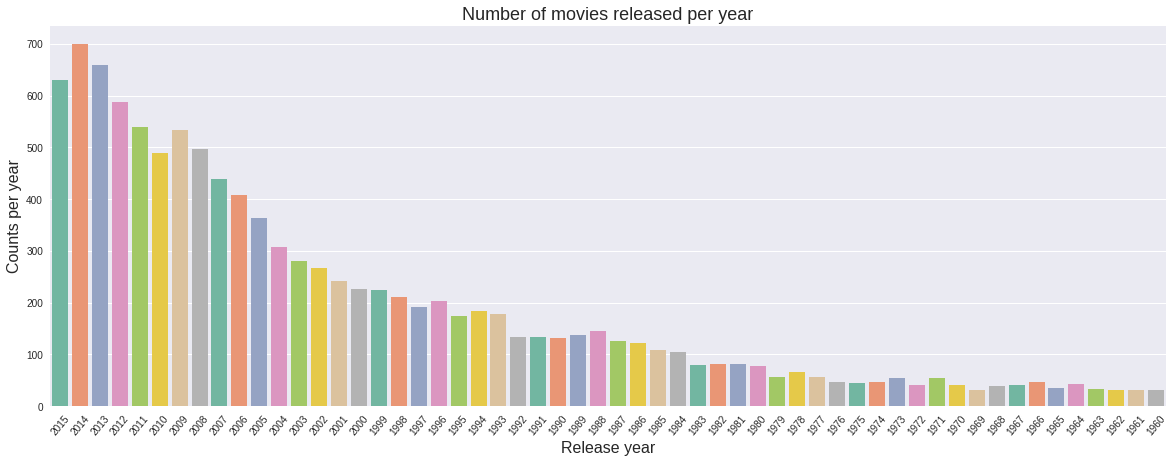

In [ ]:
# Vizualizacija ukupnog broja filmova po godinama
plt.figure(figsize = (20,7))
ax = sns.countplot(
    x = 'release_year', 
    data = movies_df, 
    order = sorted(movies_df['release_year'].value_counts().index, reverse = True), 
    palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50, fontsize = 10);
plt.xlabel('Release year', fontsize = 16);
plt.ylabel('Counts per year', fontsize = 16);
plt.title('Number of movies released per year', fontsize = 18);

In [ ]:
# Ukupan broj filmova grupiran po godinama
movies_df.groupby(['release_year']).id.agg({'count'}).sort_values(['count'], axis=0).sort_values(['count'], axis=0, ascending = True).head(3)

,count
release_year,
1961,31
1969,31
1960,32


In [ ]:
# Ukupan broj filmova grupiran po godinama
movies_df.groupby(['release_year']).id.agg({'count'}).sort_values(['count'], axis=0).sort_values(['count'], axis=0, ascending = False).head(3)

,count
release_year,
2014,700
2013,659
2015,629


In [ ]:
# Minimalni i maksimalni broj filmova
min_max_df = movies_df.groupby(['release_year']).id.agg({'count'}).agg({'max', 'min'})
min_max_df

,count
max,700
min,31


In [ ]:
min_movie = min_max_df.iloc[0][0]
max_movie = min_max_df.iloc[1][0]

In [ ]:
print(f'Minimalan broj objavljenih filmova je: {min_movie}, a maksimalan broj filmova je {max_movie}.')

Minimalan broj objavljenih filmova je: 700, a maksimalan broj filmova je 31.


> <p style="text-align: justify;">Iz grafa je vidljivo da ovaj skup podataka sadrži mali broj objavljenih filmova u razdoblju od 1960. godine do oko 1992. godine, a zatim dolazi do postepenog rasta. No, vidljiva su i dva pada broja filmova u 2009. godine gdje je broj objavljenih filmova iznosio 533, a 2010. pada za 533 - 489 = 44 filma. Zatim, ponovno raste, no 2015. godine broj objavljenih filmova je manji za 700 - 629 = 71 film od prethodne 2014. godine. Maksimalan broj filmova koji iznosi 700, objavljen je 2014. godine, a minimalan broj filmova koji iznosi 31, objavljen je 1961. godine. Od 1960. godine do 2014. godine, broj objavljenih filmova se povećao za 700 - 31 = 669 filmova gdje je vjerojatno razlog razvijena tehnologija u posljednjih 30 godina.</p>

<h4> 2. Ukupan broj objavljenih filmova po žanrovima</h4>

<hr>

In [ ]:
# Funkcija koja odvaja podatke o žanrovima
def split_data(data):
  return data.str[0:].str.split('|', expand = True)

# Pozivanje funkcije s argumentom koji sadrži podatke o žanrovima i
# spremanje u novi dataframe genres
genres = split_data(movies_df['genres'])

In [ ]:
# Postavljanje idijeva filmova za svaki žanr
genres['id'] = movies_df['id']

In [ ]:
# Funkcija koja mijenja format dataframea

def melt_df(data):
  return pd.melt(data, col_level = 0, id_vars = 'id', value_vars = [0,1,2,3,4])

# Pozivanje funkcije nad dataframeom genres
genres = melt_df(genres)

In [ ]:
genres.head()

,id,variable,value
0,135397,0,Action
1,76341,0,Action
2,262500,0,Adventure
3,140607,0,Action
4,168259,0,Action


In [ ]:
# Provjera NaN vrijednosti
genres.isna().sum()

id              0
variable        0
value       27370
dtype: int64

In [ ]:
# Brisanje NaN vrijednosti
genres.dropna(inplace = True)

In [ ]:
# Promjena naziva stupca
genres.rename(columns = {'value': 'genre'}, inplace = True)

In [ ]:
# Brisanje nepotrebnog stupca
genres.drop(['variable'], axis=1, inplace=True)

In [ ]:
# Ispis dataframea nakon izmjena
genres.head()

,id,genre
0,135397,Action
1,76341,Action
2,262500,Adventure
3,140607,Action
4,168259,Action


In [ ]:
# Spajanje dva dataframe u jedan po idjevima
genres_movies = pd.merge(movies_df , genres , how = 'inner' , on = 'id')

In [ ]:
# Prikaz novog dataframea nakon izmjena
genres_movies.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,release_month,release_day,genre
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6,9,Action
1,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6,9,Adventure


In [ ]:
# Broj filmova po žanru 
genres_movies.groupby(['genre']).id.agg({'count'}).sort_values(['count'], axis=0, ascending = False)

,count
genre,
Drama,4760
Comedy,3793
Thriller,2907
Action,2384
Romance,1712
Horror,1637
Adventure,1471
Crime,1354
Family,1231


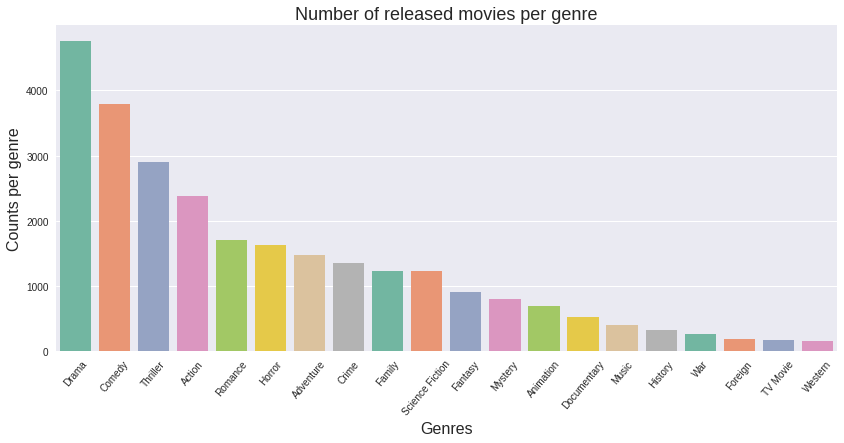

In [ ]:
# Vizualizacija broja filmova po žanru

fig = plt.figure(figsize=(14, 6))
ax = sns.countplot(x = 'genre',
              data = genres_movies,
              order = genres_movies['genre'].value_counts().index,
              palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50, fontsize = 10);
plt.xlabel('Genres', fontsize = 16);
plt.ylabel('Counts per genre', fontsize = 16);
plt.title('Number of released movies per genre', fontsize = 18);

In [ ]:
# Minimalni i maksimalni broj filmova
min_max_df = genres_movies.groupby(['genre']).id.agg({'count'}).agg({'max', 'min'})
min_max_df

,count
max,4760
min,165


> <p style="text-align: justify;">Graf pokazuje da ovaj skup podataka sadrži najviše objavljenih filmova žanra drama, njih ukupno 4760. Zatim, slijedi idući najveći broj objavljenih filmova žanra komedija, ukupno 3793. Minimalan broj objavljenih filmova koji iznosi 165 je žanra western. Može se reći da ovaj poredak ima smisla, jer se u posljednje vrijeme snimaju filmovi dramatične i komične radnje, dok su western radnje bile aktualne jako davno.</p>

<h4> 3. Ukupan broj objavljenih filmova po kompanijama</h4>

<hr>

In [ ]:
# Funkcija koja odvaja podatke o žanrovima
def split_data(data):
  return data.str[0:].str.split('|', expand = True)

# Pozivanje funkcije s argumentom koji sadrži podatke o žanrovima i
# spremanje u novi dataframe genres
companies = split_data(movies_df['production_companies'])

In [ ]:
# Postavljanje idijeva filmova za svaki žanr
companies['id'] = movies_df['id']

In [ ]:
# Funkcija koja mijenja format dataframea

def melt_df(data):
  return pd.melt(data, col_level = 0, id_vars = 'id', value_vars = [0,1,2,3,4])

# Pozivanje funkcije nad dataframeom genres
companies = melt_df(companies)

In [ ]:
companies.head()

,id,variable,value
0,135397,0,Universal Studios
1,76341,0,Village Roadshow Pictures
2,262500,0,Summit Entertainment
3,140607,0,Lucasfilm
4,168259,0,Universal Pictures


In [ ]:
# Provjera NaN vrijednosti
companies.isna().sum()

id              0
variable        0
value       31100
dtype: int64

In [ ]:
# Brisanje NaN vrijednosti
companies.dropna(inplace = True)

In [ ]:
# Promjena naziva stupca
companies.rename(columns = {'value': 'companie'}, inplace = True)

In [ ]:
# Brisanje nepotrebnog stupca
companies.drop(['variable'], axis=1, inplace=True)

In [ ]:
# Ispis dataframea nakon izmjena
companies.head()

,id,companie
0,135397,Universal Studios
1,76341,Village Roadshow Pictures
2,262500,Summit Entertainment
3,140607,Lucasfilm
4,168259,Universal Pictures


In [ ]:
# Spajanje dva dataframe u jedan po idjevima
companies_movies = pd.merge(movies_df , companies, how = 'inner' , on = 'id')

In [ ]:
# Prikaz novog dataframea nakon izmjena
companies_movies.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,release_month,release_day,companie
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6,9,Universal Studios
1,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6,9,Amblin Entertainment
2,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6,9,Legendary Pictures
3,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6,9,Fuji Television Network
4,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6,9,Dentsu


In [ ]:
# Broj filmova po žanru 
companies_movies.groupby(['companie']).id.agg({'count'}).sort_values(['count'], axis=0, ascending = False)[:10]

,count
companie,
Universal Pictures,522
Warner Bros.,509
Paramount Pictures,431
Twentieth Century Fox Film Corporation,282
Columbia Pictures,272
New Line Cinema,219
Metro-Goldwyn-Mayer (MGM),218
Walt Disney Pictures,214
Touchstone Pictures,178


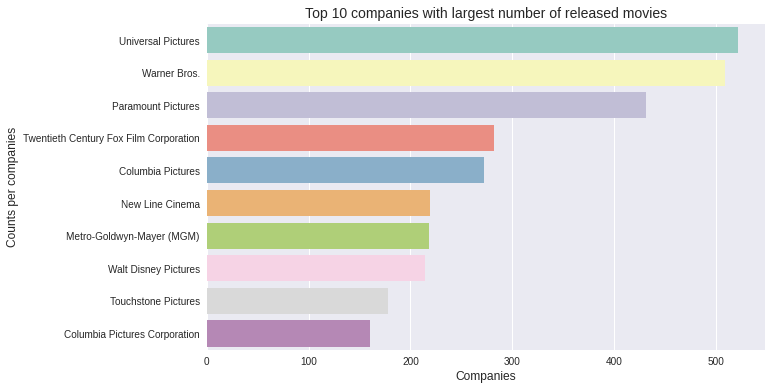

In [ ]:
# Vizualizacija broja filmova po kompanijama

fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(y = 'companie',
              data = companies_movies,
              order = companies_movies['companie'].value_counts().index[:10],
              palette='Set3') 
plt.xlabel('Companies', fontsize = 12);
plt.ylabel('Counts per companies', fontsize = 12);
plt.title('Top 10 companies with largest number of released movies', fontsize = 14);

> <p style="text-align: justify;">Graf pokazuje top 10 kompanija koje imaju najveći broj objavljenih filmova. Kao prva, ističe se Universal Pictures s ukupno 522 objavljena filma. Zatim, slijedi iduća kompanija Warner Bros s ukupno 509 objavljenih filmova. Također, ističe se kompanija Walt Disney Pictures s ukupno 214 objavljenih filmova, što znači da ovaj skup podataka sadrži i animirane crtane filmove.</p>

<h4> 3.4 Top 10 najprofitabilnijih filmova</h4>

<hr>

In [ ]:
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
movies_df['profit'] = movies_df['profit'].apply(np.int64)

In [ ]:
movies_df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,release_month,release_day,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6,9,1363528810
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,5,13,228436354
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,3,18,185238201
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,12,15,1868178225
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,4,1,1316249360


In [ ]:
# Kreiranje novog dataframea gdje se sprema top 10 najvećih profita i nazivi filmova
sorted_profit = pd.DataFrame(movies_df['profit'].sort_values(ascending=False))[:10]
sorted_profit['original_title'] = movies_df['original_title']
sorted_profit['release_year'] = movies_df['release_year']

In [ ]:
# Prikaz dataframea
sorted_profit.head(10)

,profit,original_title,release_year
1386,2544505847,Avatar,2009
3,1868178225,Star Wars: The Force Awakens,2015
5231,1645034188,Titanic,1997
0,1363528810,Jurassic World,2015
4,1316249360,Furious 7,2015
4361,1299557910,The Avengers,2012
3374,1202817822,Harry Potter and the Deathly Hallows: Part 2,2011
14,1125035767,Avengers: Age of Ultron,2015
5422,1124219009,Frozen,2013
8094,1084279658,The Net,1995


In [ ]:
# Srednja vrijednost profita
mean_profit = np.mean(movies_df['profit'])
print(f'Srednja vrijednost profita je: {int(mean_profit)}$.')

Srednja vrijednost profita je: 39588129$.


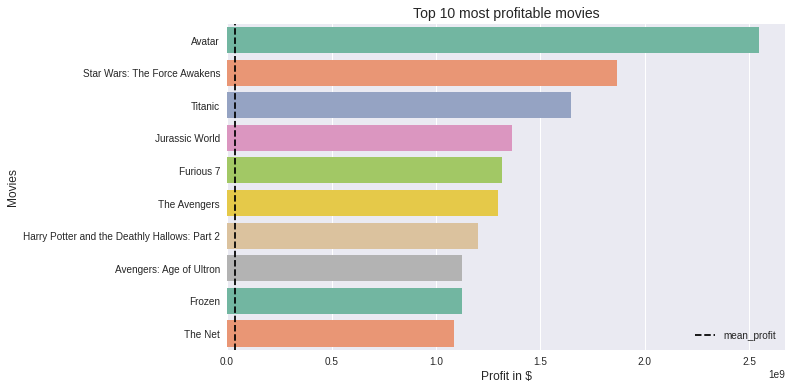

In [ ]:
# Vizualizacija top 10 najprofitiranijih filmova
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x='profit', 
                 y='original_title', 
                 data = sorted_profit, 
                 palette = 'Set2')
plt.axvline(mean_profit, color='black', linestyle='--', label='mean_profit')
plt.xlabel('Profit in $', fontsize = 12)
plt.ylabel('Movies', fontsize = 12)
plt.title('Top 10 most profitable movies', fontsize = 14)
plt.legend()

In [ ]:
# Kreiranje novog dataframea gdje se sprema top 10 s najvećim gubitkom i nazivi filmova
loss = pd.DataFrame(movies_df['profit'].sort_values(ascending=True))[:10]
loss['original_title'] = movies_df['original_title']

In [ ]:
# Prikaz dataframea
loss.head()

,profit,original_title
2244,-413912431,The Warrior's Way
5508,-165710090,The Lone Ranger
7031,-119180039,The Alamo
3484,-111007242,Mars Needs Moms
2069,-110173103,The Wolfman


> <p style='text-align: justify'> Film s najvećom zaradom je Avatar, koji broji preko 2.5 milijardi dolara. Sljedeći koji slijedi s oko 500 milijuna dolara manje je Star Wars: The Force Awakens. Zatim slijedi Titanic sa zaradom od 1.6 milijardi dolara. Deseti film je The Net s oko 1.3 milijarde manje zarade od filma Avatar. Srednje vrijednost zarade je oko 39 milijuna dolara, što znači da u ovom skupu filmova, postoji mnogo filmova s vrlo niskom zaradom i velikim gubitkom. Iz tablice se može vidjeti da je film s najvećim gubitkom oko 413 milijuna The Warrior's Way, a sljedeći slijedi The Lone Ranger s oko 250 milijuna manje.
</p>

In [ ]:
# Kreiranje novog dataframea gdje se sprema srednja vrijednost prihoda po godini
revenue_df = pd.DataFrame(movies_df.groupby('release_year')['revenue'].mean())
revenue_df.head()

,revenue
release_year,
1960,3.564617e+07
1961,3.787371e+07
1962,3.536245e+07
1963,3.713915e+07
1964,4.035943e+07


Text(0, 0.5, 'Revenue')

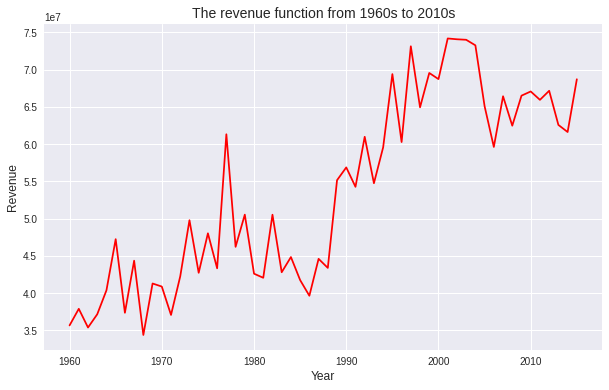

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x = 'release_year', 
                  y= 'revenue', 
                  data = revenue_df, 
                  color='red')
plt.title('The revenue function from 1960s to 2010s', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Revenue', fontsize = 12)

> <p style='text-align: justify'> Priložen je graf promjene prihoda kroz razdoblje od 1960. godine do 2015. godine. Može se vidjeti da je ranih 2000ih godina prosječan prihod bio najveći od oko 7.5 milijuna dolara. Do 1990ih, prihodi su bili manji te su se kretali između 3.5 do 5.5 milijuna dolara. Također, vidljiv je nagli rast prihoda pri kraju 1970ih godina, gdje raste s 4.5 na 6 milijuna dolara. Nakon 1990ih prihodi značajno rastu do 2007. godine kada padaju sa 7.5 na 6 milijuna dolara. Kasnije, nema značajnijeg rasta prihoda.

> U tablici najprofitabilnijih filmova najčešća godina je 2015. godina, a prema promjeni frekvencije sa 2014. godine na 2015. slijedi nagli skok prosječnog prihoda za oko 1 milijun dolara što je vjerojatno razlog navedena činjenica.
</p>

<h4> 3.5 Veza između prihoda, proračuna, popularnosti, trajanja i ocjene filma</h4>

<hr>

> <p style='text-align:justify'>Matrica korelacije je tablica koja prikazuje korelaciju između značajki. Korelacija je linearni odnos među njima, odnosno veza između svih mogućih parova značajki predstavljenih pomoću korelacijskih koeficijenata.
</p>

In [ ]:
# Uzimaju se značajke između kojih se želi provjeriti korelacija
revenue_conn = movies_df[['popularity','budget','revenue','runtime','vote_average']]

Text(0.5, 1.0, 'Correlation matrix')

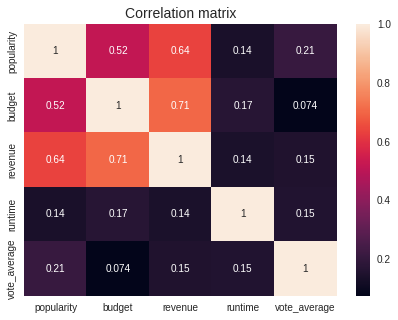

In [ ]:
# Vizualizacije matrice korelacije
fig = plt.figure(figsize=(7, 5))
ax = sns.heatmap(revenue_conn.corr(), annot=True)
plt.title('Correlation matrix', fontsize = 14)

> <p style='text-align:justify'> Provjerava se da li postoji veza između prihoda s trajanjem, popularnosti, ratingom ili proračunom filma. Kod grafa prihoda i trajanja filma, korelacija je jako slaba jer je korelacijski koeficijent jednak 0.14, što znači da ne postoji značajna veza među značajkama.</p> 

> <p style='text-align:justify'>Također, između prihoda i ocjene korelacija je jako slaba, a korelacijski koeficijent iznosi 0.15. No, postoji jaka korelacija između prihoda i proračuna gdje koeficijent iznosi 0.71, te prihoda i popularnosti gdje je koeficijent 0.64. Može se reći da kada bi se jedna varijabla povećavala ili smanjila, postojala bi velika šansa da se druga varijabla poveća ili smanji. Npr. kada se proračun za snimanje filma poveća, u većini slučajeva imalo bi smisla da je film ostvario veći prihod.</p>

<h4> 3.6 Top 10 najpopularnijih filmova</h4>

<hr>

In [ ]:
# Kreiranje novog dataframea gdje se sprema top 10 najvećih profita i nazivi filmova
popular_movies = pd.DataFrame(movies_df['popularity'].sort_values(ascending=False))[:10]
popular_movies['original_title'] = movies_df['original_title']
popular_movies['vote_average'] = movies_df['vote_average']
popular_movies['year'] = movies_df['release_year']

In [ ]:
popular_movies.head(10)

,popularity,original_title,vote_average,year
0,32.985763,Jurassic World,6.5,2015
1,28.419936,Mad Max: Fury Road,7.1,2015
629,24.949134,Interstellar,8.0,2014
630,14.311205,Guardians of the Galaxy,7.9,2014
2,13.112507,Insurgent,6.3,2015
631,12.971027,Captain America: The Winter Soldier,7.6,2014
1329,12.037933,Star Wars,7.9,1977
632,11.422751,John Wick,7.0,2014
3,11.173104,Star Wars: The Force Awakens,7.5,2015
633,10.739009,The Hunger Games: Mockingjay - Part 1,6.6,2014


In [ ]:
# Uzimaju se stupci popularity i vote_average
popularity_conn = movies_df[['popularity', 'vote_average']]

Text(0.5, 1.0, 'Correlation matrix')

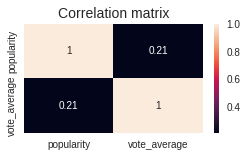

In [ ]:
# Vizualizacija matrice koleracije ovih dviju značajki
fig = plt.figure(figsize=(4, 2))
ax = sns.heatmap(popularity_conn.corr(), annot=True)
plt.title('Correlation matrix', fontsize = 14)

> <p style='text-align: justify'>Graf prikazuje top 10 najpopularnijih filmova gdje film Jurassic World ima najveću popularnost, a slijedi ga film Mad Max: Fury Road s malo manjom popularnosti. Također, može se odgovoriti na pitanje da li popularnost ovisi o ratingu filma. Iz tablice se može vidjeti da je rating filma dosta velik, između 6.5 do 8 iz čega se može zaključiti da su sljedeći popularni filmovi poviše sredine (sredina = 5.0) ljestvice ratinga, ali ne i na samom vrhuncu. Iz matrice korelacije vidljiv je korelacijski koeficijent koji iznosi 0.21, pa slijedi da je veza među značajkama slaba.

> Prema godinama iz tablice, može se zaključiti da su filmovi snimljeni i objavljeni u skorašnjem periodu, točnije 2014. i 2015. godine popularniji od onih objavljenih prije 50 godina. Tome pridonosi činjenica da su sadašnji filmovi u boji s boljom kvalitetom slike za razliku od crno-bijelih iz 1960ih, te su s raznoraznim vizualnim  i zvučnim efektima.</p>

<h4> 3.7 Top 10 najdužih filmova</h4>

<hr>

In [ ]:
# Kreiranje novog dataframea gdje se spremaju filmovi sortirani po trajanju
sorted_runtime = pd.DataFrame(movies_df['runtime'].sort_values(ascending = False))
sorted_runtime['original_title'] = movies_df['original_title']
sorted_runtime['year'] = movies_df['release_year']

In [ ]:
# Kreira se novi stupac hours
sorted_runtime['hours'] = pd.to_datetime(sorted_runtime.runtime, unit='m').dt.strftime('%H:%M')

In [ ]:
# Prikaz dataframea
sorted_runtime.head(10)

,runtime,original_title,year,hours
3894,900.0,The Story of Film: An Odyssey,2011,15:00
4041,877.0,Taken,2002,14:37
2722,705.0,Band of Brothers,2001,11:45
6176,566.0,Shoah,1985,09:26
6181,561.0,"North and South, Book I",1985,09:21
6894,550.0,Planet Earth,2006,09:10
2214,540.0,The Pacific,2010,09:00
3356,501.0,John Adams,2008,08:21
1865,500.0,Life,2009,08:20
3141,470.0,Generation Kill,2008,07:50


Text(0.5, 1.0, 'Top 10 most longest running movies')

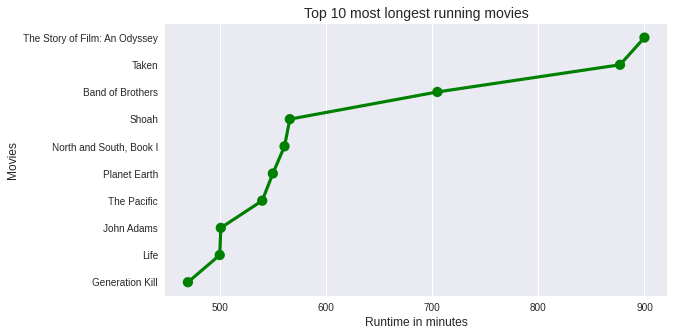

In [ ]:
# Vizualizacija top 10 najdužih filmova

fig = plt.figure(figsize=(9,5))
ax = sns.pointplot(x=sorted_runtime['runtime'].to_list()[:10], 
                 y=sorted_runtime['original_title'].to_list()[:10],
                 color = 'green')

plt.xlabel('Runtime in minutes', fontsize = 12)
plt.ylabel('Movies', fontsize = 12)
plt.title('Top 10 most longest running movies', fontsize = 14)

In [ ]:
# Dodaje se stupac žanr
sorted_runtime['genre'] = movies_df['genres']

In [ ]:
# Prikaz okvira nakon promjene
sorted_runtime.tail(5)

,runtime,original_title,year,hours,genre
10550,2.0,Luxo Jr.,1986,00:02,Animation|Family
7905,2.0,The Adventures of AndrÃ© and Wally B.,1984,00:02,Animation
10754,2.0,Bambi Meets Godzilla,1969,00:02,Animation|Comedy
4890,2.0,Cousin Ben Troop Screening,2012,00:02,NaN
4883,2.0,Fresh Guacamole,2012,00:02,Animation


> <p style='text-align:justify'>Najdugometražniji film iz skupa podataka je povijesni dokumentarni film The Story of Film: An Odyssey, a traje 15 sati. Idući po redu je film iz 2002. godine, koji traje 20 minuta kraće nego An Odyssey, pod nazivom Taken. Oba filma se zapravo sastoje od 10ak epizoda iz čega slijedi činjenica da su najdugometražniji među filmovima. Najkraći filmovi koji traju oko 2 minute su uglavnom animiranog žanra, a izdvajaju se Luxo Jr., Fresh Guacamole te Bambi Meet Godzilla.
</p>

<h4> 3.8 Najprofitabilniji glumici/glumace od 2006. do 2015. godine </h4>

<hr>

In [ ]:
# Pozivanje funkcije s argumentom koji sadrži podatke o ulogama i
# spremanje u novi dataframe cast
cast = split_data(movies_df['cast'])

In [ ]:
# Postavljanje idijeva filmova za svaku ulogu
cast['id'] = movies_df['id']

In [ ]:
# Pozivanje funkcije nad dataframeom cast
cast = melt_df(cast)

In [ ]:
cast.head()

,id,variable,value
0,135397,0,Chris Pratt
1,76341,0,Tom Hardy
2,262500,0,Shailene Woodley
3,140607,0,Harrison Ford
4,168259,0,Vin Diesel


In [ ]:
# Provjera NaN vrijednosti
cast.isna().sum()

id             0
variable       0
value       1757
dtype: int64

In [ ]:
# Brisanje NaN vrijednosti
cast.dropna(inplace = True)

In [ ]:
# Promjena naziva stupca
cast.rename(columns = {'value': 'actor'}, inplace = True)

In [ ]:
# Brisanje nepotrebnog stupca
cast.drop(['variable'], axis=1, inplace=True)

In [ ]:
# Ispis dataframea nakon izmjena
cast.head()

,id,actor
0,135397,Chris Pratt
1,76341,Tom Hardy
2,262500,Shailene Woodley
3,140607,Harrison Ford
4,168259,Vin Diesel


In [ ]:
# Spajanje dva dataframe u jedan po idjevima
cast_movies = pd.merge(movies_df , cast , how = 'inner' , on = 'id')

In [ ]:
# Prikaz novog dataframea nakon izmjena
cast_movies.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,release_month,release_day,profit,rating,actor
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6,9,1363528810,1,Chris Pratt
1,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6,9,1363528810,1,Bryce Dallas Howard


In [ ]:
# Kreiranje novog dataframea gdje se spremaju najprofitabilniji glumci po godinama
profit_cast = cast_movies.groupby(['actor', 'release_year']).sum().sort_values(by = ['profit'], ascending = False)
profit_cast['cast'] = profit_cast.index.get_level_values(0)

In [ ]:
# Uzimaju se prvi najprofitabilniji u posljednjih 10 godina
year_cast = profit_cast.groupby('release_year').first()[-10:]

In [ ]:
year_cast.head()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_month,release_day,profit,rating,cast
release_year,,,,,,,,,,,,
2006,17758,4.810062,2.146243e+08,1.105487e+09,192.0,3197,12.5,9,23,890862422,1,Johnny Depp
2007,21172,4.982474,1.646243e+08,9.780396e+08,228.0,3434,13.4,18,54,813415348,2,Emma Watson
2008,29906,8.653387,1.996243e+08,1.041749e+09,197.0,8445,16.1,14,31,842124435,2,Christian Bale
2009,287634,10.028370,3.366243e+08,3.184497e+09,289.0,10161,19.4,23,40,2847872722,2,Michelle Rodriguez
2010,122718,11.931539,4.796243e+08,2.433811e+09,462.0,8052,27.2,34,56,1954187137,4,Helena Bonham Carter


In [ ]:
# Funkcija koja postavlja labele za točke
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis = 1)
    for i, point in a.iterrows():
        ax.text(point['x']+.1, point['y'], str(point['val']), ha = 'center', va = 'baseline')

In [ ]:
# Koordinate točaka
for path in ax.collections:
    points = path.get_offsets()

all_x_values = [path.get_offsets()[:, 0] for path in ax.collections][0]
all_y_values = [path.get_offsets()[:, 1] for path in ax.collections][0]

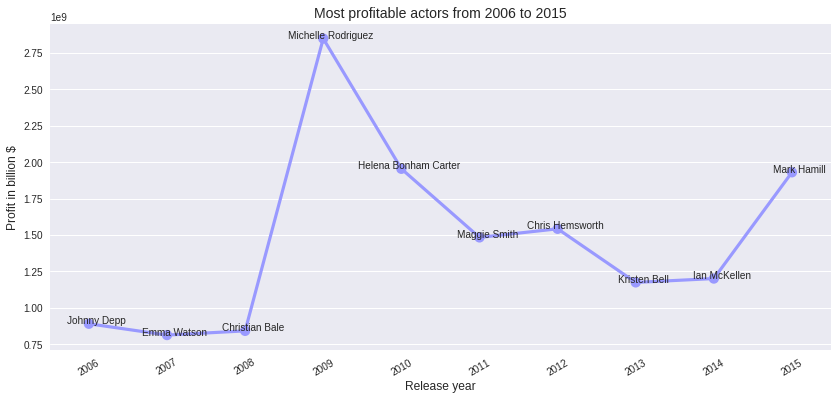

In [ ]:
# Vizualizacija najprofitabilnijih glumaca i glumica od 2006. do 2015. godine

plt.figure(figsize = (14, 6))
ax = sns.pointplot(
    x = sorted(movies_df['release_year'].unique())[-10:],
    y = 'profit', 
    data = year_cast,
    color = '#9999FF')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, fontsize = 10);
plt.xlabel('Release year', fontsize = 12);
plt.ylabel('Profit in billion $', fontsize = 12);
plt.title('Most profitable actors from 2006 to 2015', fontsize = 14);

label_point(pd.Series(all_x_values), pd.Series(all_y_values), pd.Series(year_cast['cast'].to_list()[-10:]), plt.gca())

> <p style='text-align: justify'> Prikazan je graf najprofitabilnijih glumaca i glumica u razdoblju od 2006. do 2015. godine. Godine 2006. glumac koji je glumio u najprofitabilnijim filmovima i prema tome najviše zaradio je Johnny Deep. Iduće godine, glumica Emma Watson je profitirala najbolje, a najprofitabilnija glumica u ovih 10 godina je Michelle Rodriguez, koja je glumila u najprofitabilnijim filmovima te godine, a jedan od njih je film Avatar.
</p>

#### <h3>4.&emsp;Tekstualna analiza skupa podataka i vizualizacija</h3> 


<hr>
<p> U skupu podataka postoje dva stupca koja se odnose na ključne riječi te na kratak sadržaj filmova. Može se obaviti analiza nad tim nestrukturiranim podacima, u ovom slučaju nad tekstualnim podacima, a za to će se koristiti kratki sadržaji filmova.
</p>

In [ ]:
# Provjerava se da li postoje NaN vrijednosti u stupcu kratkog sadržaja
movies_df.overview.isna().sum()

4

In [ ]:
# Stavlja se prazan string za one vrijesnosti koje nedostaju
movies_df.overview.fillna('', inplace=True)

In [ ]:
# Spremanje svih kratkih sadržaja filmova u jedan veliki string
overviews = ' '.join(movies_df['overview'].tolist())

In [ ]:
# Ispis tipa, prvih 1000 znakova i ukupan broj znakova

print("Type sirovi tekst:", type(overviews))
print("\nSirovi tekst:")
print(overviews[:1000]) # prvih 1000 znakova stringa
print("\nBroj znakova:", len(overviews)) # koliko znakova ima cijela datoteka

Type sirovi tekst: <class 'str'>

Sirovi tekst:
Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond. An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath of the chaos. And Furiosa, a woman of action and a woman who believes her path to survival may be achieved if she can make it across the desert back to her childhood homeland. Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance which threatens to tear her society apart. Thirty years after defeating the Galactic Empire, Han 

<p style='text-align: justify'> Prilikom istraživanja podataka zanimljiva su sljedeća pitanja o tekstu:</p>

<ol>
  <li>broj rečenica?</li>
  <li>broj riječi?</li>
  <li>broj jedinstvenih riječi?</li>
</ol>

<p>Za odgovoriti na ova pitanja, koristit će se Pythonova biblioteka <b>nltk</b> (eng. Natural Language Toolkit).
</p>

<h4>4.1 Broj rečenica, riječi i jedinstvenih riječi</h4>

<hr>

In [ ]:
# Učitavanje biblioteke
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Učitavanje alata
from nltk import tokenize
word_tokenizer = tokenize.TreebankWordTokenizer()

In [ ]:
# Podijela teksta na rečenice
sentences = tokenize.sent_tokenize(overviews) 
# Podijela rečenica na tokene
sentences_with_words = word_tokenizer.tokenize_sents(sentences) 

In [ ]:
# Lista svih riječi
words = [word for sentence in sentences_with_words for word in sentence]
# Jedinstvene riječi
unique_words = set(words)

In [ ]:
# Ispis ukupnog broja rečenica, riječi i jedinstvenih riječi
print("Broj rečenica:", len(sentences))
print("Broj riječi (tokena):", len(words))
print("Broj jedinstvenih riječi (tokena):", len(unique_words))

Broj rečenica: 25655
Broj riječi (tokena): 639670
Broj jedinstvenih riječi (tokena): 41696


In [ ]:
# 10 najučestalijih tokena
from collections import Counter
counter_words = Counter()

for word in words:
    if word not in string.punctuation:
      counter_words.update({word})

counter_words.most_common(10)

[('the', 28834),
 ('a', 20654),
 ('to', 17411),
 ('and', 16859),
 ('of', 15549),
 ('in', 9239),
 ('his', 8387),
 ('is', 7894),
 ("'s", 5680),
 ('with', 5173)]

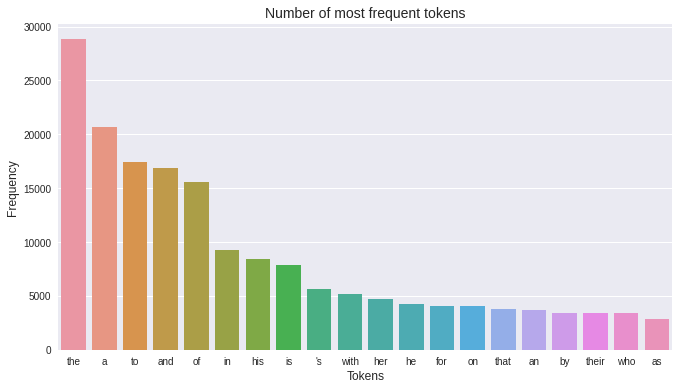

In [ ]:
# Vizualizacija 20 najčešćih tokena s njihovim frekvencijama

xs=[x for x, y in counter_words.most_common(20)]
ys=[y for x, y in counter_words.most_common(20)]

plt.figure(figsize = (11, 6))
sns.barplot(
    x=xs[:20], 
    y=ys[:20])
plt.xlabel("Tokens", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.title('Number of most frequent tokens', fontsize = 14);
plt.show()

> <p style='text-align: justify'>Tekst kratkih sadržaja svih filmova ukupno sadrži 25 655 rečenica, koje su sastavljene od 639 670 riječi. Broj riječi koje se ne ponavljaju iznosi ukupno 41 696. Također, postavlja se pitanje koje su najučestalijih riječi u tekstu. Može se vidjeti da su to uglavnom članovi, veznici i prijedlozi. Najučestaliji riječi su članovi: <b>the</b>, <b>a</b> koje se u tekstu pojavljuju preko 20 000 puta i veznik <b>and</b> koji se pojavljuje preko 16 000 puta.</p>

<img href='/content/drive/MyDrive/UPZ_seminar/fig.html'/>

In [ ]:
# Broj riječi po broju pojavljivanja u tekstu
freqs=[f for w, f in counter_words.items()]
print("Koliko se riječi javlja 1 put u tekstu? ", freqs.count(1))
print("Koliko se riječi javlja 10 puta u tekstu? ", freqs.count(10))
print("Koliko se riječi javlja 100 puta u tekstu? ", freqs.count(100))
print("Koliko se riječi javlja 1056 puta u tekstu? ", freqs.count(1000))

Koliko se riječi javlja 1 put u tekstu?  20383
Koliko se riječi javlja 10 puta u tekstu?  459
Koliko se riječi javlja 100 puta u tekstu?  8
Koliko se riječi javlja 1056 puta u tekstu?  0


> <p>Najviše riječi u tekstu se pojavljuju jednom, kao što su riječi: <b>malverous</b> i <b>flirt</b>. Ukupno takvih riječi ima 20 383. Zatim, slijedi da se riječi kao što su: <b>explorer</b> i <b>ex-hausband</b> u tekstu pojavljuju 10 puta, dok se riječ kao što je <b>ultimate</b> pojavljuje 100 puta, itd. </p>

<h4>4.2 Tagiranje rečenica</h4>

<hr>

> <p style='text-align: justify'> U lingvistici, Part-of-Speech (POS tagging ili POST) ili  gramatičko označavanje je proces označavanja riječi u tekstu na temelju njene definicije i konteksta. Pomoću gramatičkog označavanja može se doznati koje imenice, pridjeve ili glagole sadrži tekst.
</p>

In [ ]:
from nltk import pos_tag_sents  # more magic
nltk.download('averaged_perceptron_tagger')
tagged_sentences = pos_tag_sents(sentences_with_words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# Funkcija koja vraća frekvencije riječi ovisno o definiciji

def count_word_type(tagged_sentences, word_type_tag = "NN"):
  counter = Counter()
  for sentence in tagged_sentences:
    for word, tag in sentence:
        if word_type_tag in tag and len(word) > 4:
            counter.update({word})
  return counter

In [ ]:
# 20 najčešćih imenica
count_word_type(tagged_sentences, "NN").most_common(20)

[('family', 1115),
 ('world', 1050),
 ('story', 931),
 ('years', 720),
 ('friends', 714),
 ('father', 695),
 ('woman', 680),
 ('school', 604),
 ('group', 586),
 ('friend', 517),
 ('mother', 485),
 ('death', 431),
 ('people', 430),
 ('daughter', 422),
 ('lives', 396),
 ('house', 361),
 ('night', 333),
 ('murder', 324),
 ('relationship', 309),
 ('parents', 305)]

<h4>4.3 Vizualizacija Word Cloud</h4>

<hr>

In [ ]:
from wordcloud import WordCloud

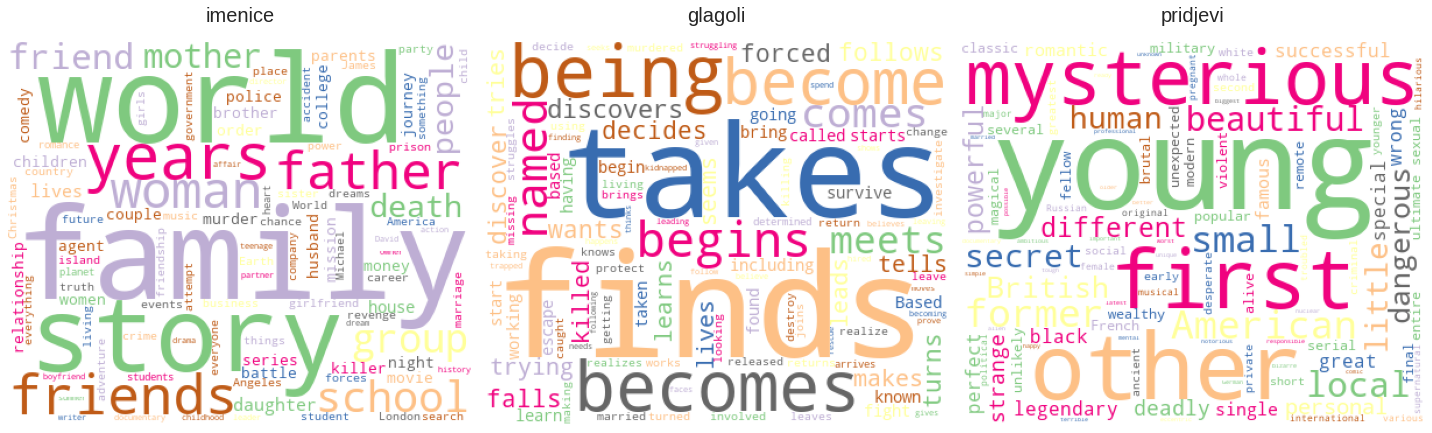

In [ ]:
# Vizualizacija najčešćih imenica, pridjeva i glagola u kratkim sadržajima

fig = plt.figure(figsize=(20,10))

tags = {"NN": "imenice", "VB": "glagoli", "JJ": "pridjevi"}
for i, tag in enumerate(tags.keys()):
  plt.subplot(1,3,i+1)
  counter = count_word_type(tagged_sentences, tag)
  wc = WordCloud(
      width=400, 
      height=330, 
      max_words=100, 
      colormap="Accent", 
      background_color="white").generate_from_frequencies(counter)
  plt.imshow(wc)
  plt.axis("off")
  plt.title(tags[tag], fontsize=20, pad=20)
plt.tight_layout()
plt.show()

><p> Iz vizualizacije najčešćih riječi može se zaključiti da se radnje filmova najčešće povezuju sa svijetom, obitelji, prijateljstvom i školom. Također, u većini filmova radi se o mladim ljudima, ljubavi, a radnje se najčešće odvija u Americi i Velikoj Britaniji što se može zaključiti iz najčešćih pridjeva <b>American</b> i <b>British</b>. Po najčešćim glagolima, kao što su <b>discover</b> i <b>finds</b> može se zaključiti da se u radnjama filmova pokušava nešto pronaći ili istražiti.

#### <h3>5.&emsp;Testiranje hipoteza</h3> 


<hr>
<p> Testiranje hipoteza je oblik statističkog zaključivanja koji koristi podatke iz uzorka za donošenje zaključaka o parametru populacije ili distribuciji vjerojatnosti populacije. 
</p>

> Testiranje statističkih hipoteza bolje će se dočarati primjerom broja objavljenih filmova u 2013. i 2014. godini. 

> Pretpostavimo da podaci na raspolaganju predstavljaju **uzorak** objavljenih filmova iz populacije koja odgovara 2013. godini i populacije koja odgovara 2014. godini.

In [ ]:
# Dohvaćaju se filmovi po godinama
movies_2013 = movies_df.loc[movies_df['release_year'] == 2013]
movies_2014 = movies_df.loc[movies_df['release_year'] == 2014]

In [ ]:
# Broj filmova u 2013. i 2014. godini grupiranih po datumu
movies_2013 = movies_2013.groupby(['release_date']).size()
movies_2014 = movies_2014.groupby(['release_date']).size()

In [ ]:
# Prikaz broja filmova u 2013. godini
movies_2013.head()

release_date
2013-01-01    4
2013-01-03    2
2013-01-04    2
2013-01-06    1
2013-01-07    1
dtype: int64

In [ ]:
# Prikaz broja filmova u 2014. godini
movies_2014.head()

release_date
2014-01-01    2
2014-01-02    1
2014-01-03    1
2014-01-06    1
2014-01-08    1
dtype: int64

> Pitanje koje se postavlja je da li postoji statistički značajna razlika u broju objavljenih filmova u 2013. i 2014. godini.

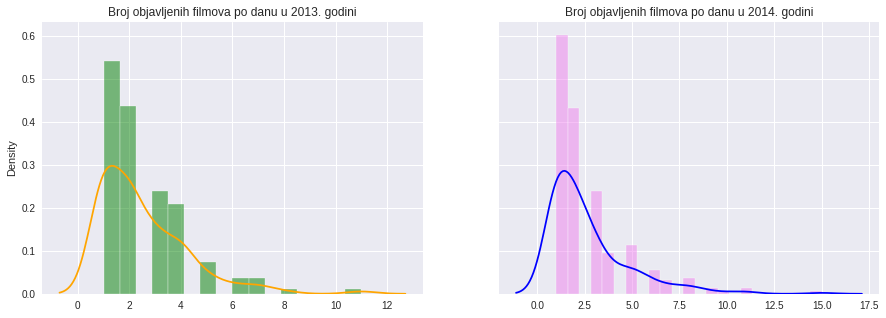

<Figure size 720x360 with 0 Axes>

In [ ]:
# Histogrami prikazuju distribucije objavljenih filmova po godinama

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
plt.figure(figsize=(10,5))
axes[0].set_title('Broj objavljenih filmova po danu u 2013. godini')
sns.histplot(movies_2013, stat='density', alpha=0.5, color='green', edgecolor='white',ax=axes[0])
sns.kdeplot(movies_2013,  color='orange', ax=axes[0])
axes[1].set_title('Broj objavljenih filmova po danu u 2014. godini')
sns.histplot(movies_2014, stat='density', alpha=0.5, color='violet', edgecolor='white', ax=axes[1])
sns.kdeplot(movies_2014,  color='blue', ax=axes[1])
plt.show()

> Procjenitelji očekivanih srednjih vrijednosti i standardnih devijacija u 2013. i 2014. godini

In [ ]:
print(f'2013 godina: mean = {movies_2013.mean():.2f}, std = {movies_2013.std():.2f}')
print(f'2014 godina: mean = {movies_2014.mean():.2f}, std = {movies_2014.std():.2f}')

2013 godina: mean = 2.53, std = 1.73
2014 godina: mean = 2.67, std = 2.16


> Iz izračuna slijedi da postoji razlika u srednjim vrijednostima i standardnim devijacijama ova dva uzorka, a može biti slučajna zbog varijabilnosti procjenitelja.
Također, razlog može biti taj da su financijski uvjeti bili različiti tijekom ove dvije godine, pa se zbog toga smatra da podaci ne pripadaju istoj distribuciji. 

> Bitno pitanje slijedi iz toga: da li je uočeni fenomen stvaran, odnosno da li je promatrani fenomen statistički značajan? U ovom slučaju fenomen se odnosi na <b>razliku u srednjim vrijednostima dnevnog broja objavljenih filmova u 2013. godini i 2014. godini</b>.

> Testiranje statističkih hipoteza je postupak donošenja odluke o
odbacivanju ili neodbacivanju pretpostavke o fenomenu. Dakle, pomoću nulte i alternativne hipoteze definirati će se postavljeno pitanje:

<br>

**$H_0$: Srednja vrijednost broja objavljenih filmova je jednaka u 2013. godini i u 2014. godini.** 
<br>

<center>$H_0:  \left(\mu_{2013} =\mu_{2014}\right)$</center>

> $H_0$ tj. nul-hipoteza predstavlja slučajnu pretpostavku o parametru ili distribuciji. 

<br>

**$H_1:$ Srednja vrijednost broja objavljenih filmova u 2013. godini i u 2014. godini je različita.**
<br>

<center>$H_1:  \left(\mu_{2013} \neq\mu_{2014}\right)$</center>

> $H_1$ tj. alternativna hipoteza predstavlja stvarnu činjenicu o parametru ili distribuciji.
<br>

> Statistika pomoću koje se donosi odluka o odbacivanju ili
neodbacivanju $H_0$ zove se **test-statistika**.
> No, niti jedna odluka bazirana na uzorcima nije 100% pouzdana, pa ni
zaključci statističkog testa nisu 100% pouzdani.
Može se dogoditi da je odluka donesena temeljem statističkog testa
pogrešna.

> Stoga je potrebno definirati broj $α ∈ (0, 1)$ koji predstavlja maksimalnu pogrešku koja se čini kada se odbacuje istinita $H_0$ - pogreška 1. tipa odnosno **nivo značajnosti**.
> U ovom slučaju nivo značajnosti iznosi $ α = 0.05$.

> U statističkom testiranju hipoteza, $p$-vrijednost mjera je vjerojatnosti pronalaska promatranih ili ekstremnijih rezultata, kada je nulta hipoteza određenog statističkog testa točna. Odnosno, omogućuje da se odredi da li postoji dovoljno dokaza za odbacivanje nulte hipoteze $H_0$:

- Ako je $p$-vrijednost mala tada je mala vjerojatnost da podaci potvrđuju nultu hipotezu kao istinitu: 
>$p\text{-vrijednost} < \alpha$: *odbacuje se nul-hipotezu*.


- Ako je $p$-vrijednost velika, onda postoji velika vjerojatnost da su podaci sukladni s pretpostavkama nul-hipoteze, stoga se u tom slučaju nul-hipotezu ne odbacuje.
> $p\text{-vrijednost} \geq \alpha$: *ne odbacuje se nul-hipotezu*.

> Testna statistika koja se koristi je **Mann–Whitney U test** koja testira statističku značajnost neovisno o kakvim se distribucijama radi.

In [ ]:
test = stats.mannwhitneyu(movies_2013, movies_2014, alternative='two-sided')

In [ ]:
test

MannwhitneyuResult(statistic=34500.5, pvalue=0.7914557172879482)

In [ ]:
print(f'p-vrijednost testa iznosi: {round(test[1],3)} što je veća od α pa se na razini značajnosti od 0.05 ne odbacuje H0.')
print('Može se tvrditi da postoji dokaz da je srednja vrijednost broja objavljenih filmova jednaka u 2013. godini i u 2014. godini.')

p-vrijednost testa iznosi: 0.791 što je veća od α pa se na razini značajnosti od 0.05 ne odbacuje H0.
Može se tvrditi da postoji dokaz da je srednja vrijednost broja objavljenih filmova jednaka u 2013. godini i u 2014. godini.


> Provjerit će se da li broj objavljenih filmova dolazi iz normalne distribucije pomoću **normaltest** testne statistike.


In [ ]:
stats.normaltest(movies_2013)

NormaltestResult(statistic=99.8651803497444, pvalue=2.063248888952846e-22)

In [ ]:
stats.normaltest(movies_2014)

NormaltestResult(statistic=126.01367317737939, pvalue=4.329906789652633e-28)

> Kod oba slučaja p-vrijednost je vrlo mala, pa slijedi da se na razini značajnosti od 0.05 odbacuje $H_0$, odnosno može se tvrditi da ne postoji dokaz da distribucije broja objavljenih filmova ova dva uzorka dolaze iz normalne distribucije.

#### <h3>6.&emsp;Predviđanje broja objavljenih filmova do 2023. godine</h3> 


<hr>
<p> Predviđanje ili prognoziranje (eng. forecasting) je uobičajen zadatak podatkovne znanosti koji pomaže različitim poslovnim organizacijama pri planiranju kapaciteta, donošenju različitih odluka, postavljanju ciljeva i otkrivanju anomalija. 

> Temelji se na predviđanju budućnosti što je moguće točnije koristeći dostupne informacije poput povijesnih podataka i spoznaja o potencijalnim budućim događanjima koja bi mogla utjecati na predviđanje.

> **The Prophet Forecasting Model** je procedura za predviđanje vremenskih nizova.




In [ ]:
# Instalacija potrebnog modula za predviđanje
!pip install prophet

In [ ]:
# Učitavanje modela za predviđanje
from prophet import Prophet

plt.style.use('seaborn')

> Prophet model kao ulaz očekuje *dataframe* s dva stupca  `ds` i `y`: 
- `ds` (datastamp): idealno oblika `YYYY-MM-DD` za datum ili `HH:MM:SS` za vrijeme
- `y`: numeričke vrijednosti, mjerenje koje se želi predviđati.

In [ ]:
movies_count = movies_df.groupby(['release_date']).size().to_list()
years = sorted(movies_df.release_date.apply(lambda row: row.strftime('%Y-%m-%d')).drop_duplicates().to_list())

In [ ]:
data = {'ds': years,'y': movies_count}

In [ ]:
years_movies = pd.DataFrame(data)
years_movies

,ds,y
0,1960-01-01,2
1,1960-02-11,1
2,1960-02-22,1
3,1960-03-01,1
4,1960-03-27,1
...,...,...
5904,2015-12-25,4
5905,2015-12-26,1
5906,2015-12-27,1
5907,2015-12-30,1


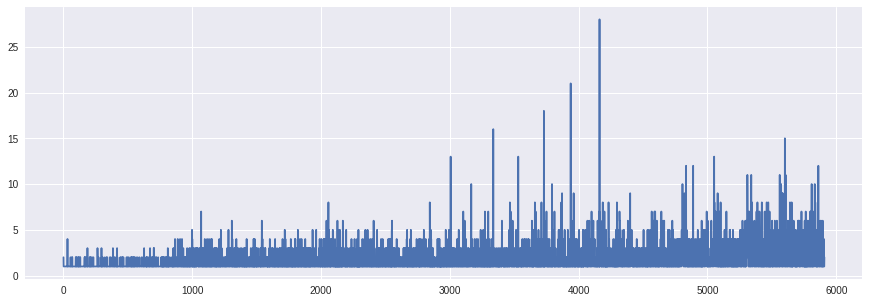

In [ ]:
# Vizualizacija sirovih podataka
plt.figure(figsize=(15,5))
plt.plot(years_movies.y)
plt.show()

In [ ]:
# Fitanje modela
m = Prophet(daily_seasonality=True)
m.fit(years_movies)

In [ ]:
# Okvir s datumima koji se žele prognozirati
future = m.make_future_dataframe(periods= 96, freq='M')

In [ ]:
future.tail()

,ds
6000,2023-08-31
6001,2023-09-30
6002,2023-10-31
6003,2023-11-30
6004,2023-12-31


In [ ]:
# predict metoda svakom retku pridjeljuje predviđenu vrijednost `yhat`
# zajedno s intervalima "nesigurnosti"
forecast = m.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() 

,ds,yhat,yhat_lower,yhat_upper
6000,2023-08-31,3.665303,2.198772,5.284210
6001,2023-09-30,3.022912,1.415511,4.563173
6002,2023-10-31,2.829940,1.187567,4.384516
6003,2023-11-30,3.250462,1.652675,4.876291
6004,2023-12-31,3.655985,2.032725,5.231049


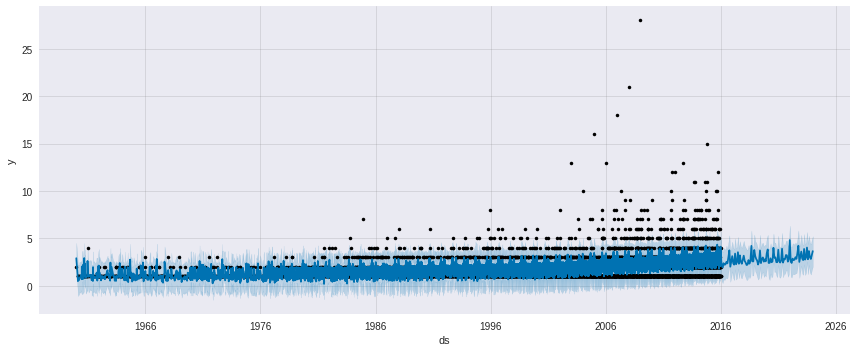

In [ ]:
# Vizualizavcija prognoziranja broja objavljenih filmova
fig1 = m.plot(forecast, figsize=(12,5))

> Svaka crna točkica odgovara stvarnim podacima, odnosno stvarnom broju objavljenih filmova po godinama. Plava linija predstavlja prognozirane vrijednosti. Može se uočiti da u podaci lošije predviđeni za razdoblje od 1980ih do 2016. godine (vidi se mali skok prema gore u razdoblju od 2006. do 2016. godine, ali su stvarni podaci izraženiji). 

> Za 2023. godinu prognozira se postepeni, ali slabi rast broja objavljenih filmova. Kroz godine se predviđa ukupno od 2 do 5 dnevno objavljena filma. Može se reći da je teško prognozirati dnevni broj filmova jer broj varira iz dana u dan.

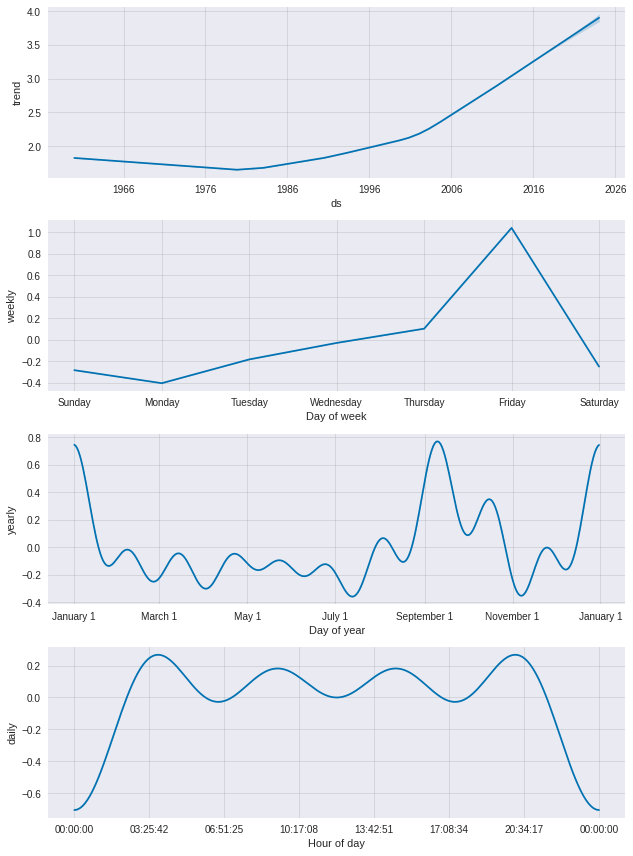

In [ ]:
# Vizualizacija individualnih komponenti vremenskog niza
fig2 = m.plot_components(forecast)

> Iz prve vizualizacije je vidljivo da se broj objavljenih filmova postepeno raste od 1980ih do 1990ih godina. Zatim se naglo počeo povećavati od 2000ih godina, te raste sve do danas. Dakle, može se zaključiti da se predviđa postepeni rast broja objavljenih filmova do 2023. godine.

> Druga vizualizacija predstavlja tjedni rast broja objavljenih filmova, odnosno broj objavljenih filmova po danima u tjednu. Može se vidjeti da je najviše objavljenih filmova četvrtkom i petkom, a utorak, srijeda i subota su za manji broj filmova idući. Najmanje filmova se objavljivalo nedjeljom i ponedjeljkom.

#### <h3>7.&emsp;Klasifikacija i regresija u strojnom učenju i neuronske mreže u dubokom učenju</h3> 


<hr>
<p>
Klasifikacija i regresija su dva glavna problema predviđanja koja se obično rješavaju u strojnom učenju.

Klasifikacija je proces pronalaženja modela ili funkcije koji pomaže u odvajanju podataka u više kategoričkih klasa, tj. diskretnih/nebrojčanih vrijednosti.

Regresija je proces pronalaženja modela ili funkcije za razlikovanje podataka u kontinuirane/brojčane stvarne vrijednosti.

> Podaci koji su na raspolaganju za učenje sadrže informaciju o točnom odgovoru, a oblika su $(ulaz, izlaz) = (x,y)$, a želi se pronaći funkciju $f: x \mapsto \hat{y}$.

Unaprijedne neuronske mreže su esencijalni modeli dubokog učenja kojima je cilj aproksimacija neke funkcije f.
</p>

In [ ]:
# podjela podataka na skup za treniranje i skup za testiranje
from sklearn.model_selection import train_test_split 

# modeli klasifikacija
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# modeli regresija
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# evaluacijske metrike
from sklearn import metrics

# za vizualizaciju stabla odluke
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
import pydotplus 

# procesiranje podataka
from sklearn.preprocessing import StandardScaler

# neuronska mreza
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

<h4>7.1 Klasifikacija</h4>

<hr>

> Želi se na temelju ratinga filmova utvrditi da li je film dobar ili loš.

Predviđamo vrijednost `vote_average` stupca: 
- **0**: ako je film ocjenjen ocjenom <= 6, film je loš
- **1**: ako je film ocjenjen ocjenom > 6, film je dobar

In [ ]:
# Klasificiranje ocjene filma pomoću vote_average
movies_df['rating'] = movies_df['vote_average'].apply(lambda x: 1 if x >= 6 else 0) 

In [ ]:
movies_df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,release_month,release_day,profit,rating
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6,9,1363528810,1
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,5,13,228436354,1


> Provjera koliko je pojedina klasa zastupljena u danom skupu podataka

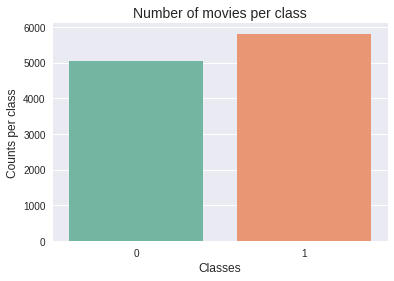

In [ ]:
# Vizualizacija broja filmova po klasi

fig = plt.figure(figsize=(6, 4))
ax = sns.countplot(x = 'rating',
              data = movies_df,
              palette='Set2') 
plt.xlabel('Classes', fontsize = 12);
plt.ylabel('Counts per class', fontsize = 12);
plt.title('Number of movies per class', fontsize = 14);

In [ ]:
# Ukupan broj filmova po klasi
movies_df.rating.value_counts()

1    5810
0    5055
Name: rating, dtype: int64

> Iz grafa se vidi da su zastupljeniji filmovi s većim ratingom odnosno dobri filmovi, a ima ih ukupno 5810, dok filmova s manjim ratingom odnosno loših filmova ima malo manje, ukupno 5055.

> U varijablu X_clf se spremaju podaci o značajkama `popularity, budget, revenue, vote_count, profit`, a u y_clf podaci o značajki `rating`.


In [ ]:
# Značajke koje se treniraju i značajka koja se predviđa
X_clf = movies_df[['popularity', 'budget', 'revenue', 'vote_count', 'profit']]
y_clf = movies_df['rating']

In [ ]:
X_clf.head()

,popularity,budget,revenue,vote_count,profit
0,32.985763,150000000.0,1.513529e+09,5562,1363528810
1,28.419936,150000000.0,3.784364e+08,6185,228436354
2,13.112507,110000000.0,2.952382e+08,2480,185238201
3,11.173104,200000000.0,2.068178e+09,5292,1868178225
4,9.335014,190000000.0,1.506249e+09,2947,1316249360


In [ ]:
y_clf.head()

0    1
1    1
2    1
3    1
4    1
Name: rating, dtype: int64

> Dijele se podaci na skup za treniranje i skup za testiranje. U skupu za treniranje uči se model, a na skup za testiranje evaluira se skup za treniranje odnosno provjerava se koliko se dobro ponaša model nad nekim novim podacima.

> Podijelit će se podaci na skupove za treniranje i testiranje tako da skup za treniranje sadrži `70%` originalnih podataka, a skup za testiranje preostalih `30%`.

In [ ]:
# Podjela podataka na skup za treniranje i testiranje
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.3, random_state=2) 

In [ ]:
# Duljine skupova
print(X_train.shape)
print(X_test.shape)

(7605, 5)
(3260, 5)


> Nakon podjele u skupu za treniranje nalazi se `7605` zapisa s `5` značajki, a u skupu za testiranje nalazi se `3260` zapisa.

> Provjerimo jesu li nam obje klase zastupljene u skupovima za treniranje i testiranje

In [ ]:
print(y_train.value_counts())

1    4056
0    3549
Name: rating, dtype: int64


In [ ]:
print(y_test.value_counts())

1    1754
0    1506
Name: rating, dtype: int64


<h5>7.1.1 Stablo odluke</h5>

<hr>

In [ ]:
# Definiranje modela i fittanje podataka
tree_decision_cf = DecisionTreeClassifier(max_depth = 5)
tree_decision_cf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

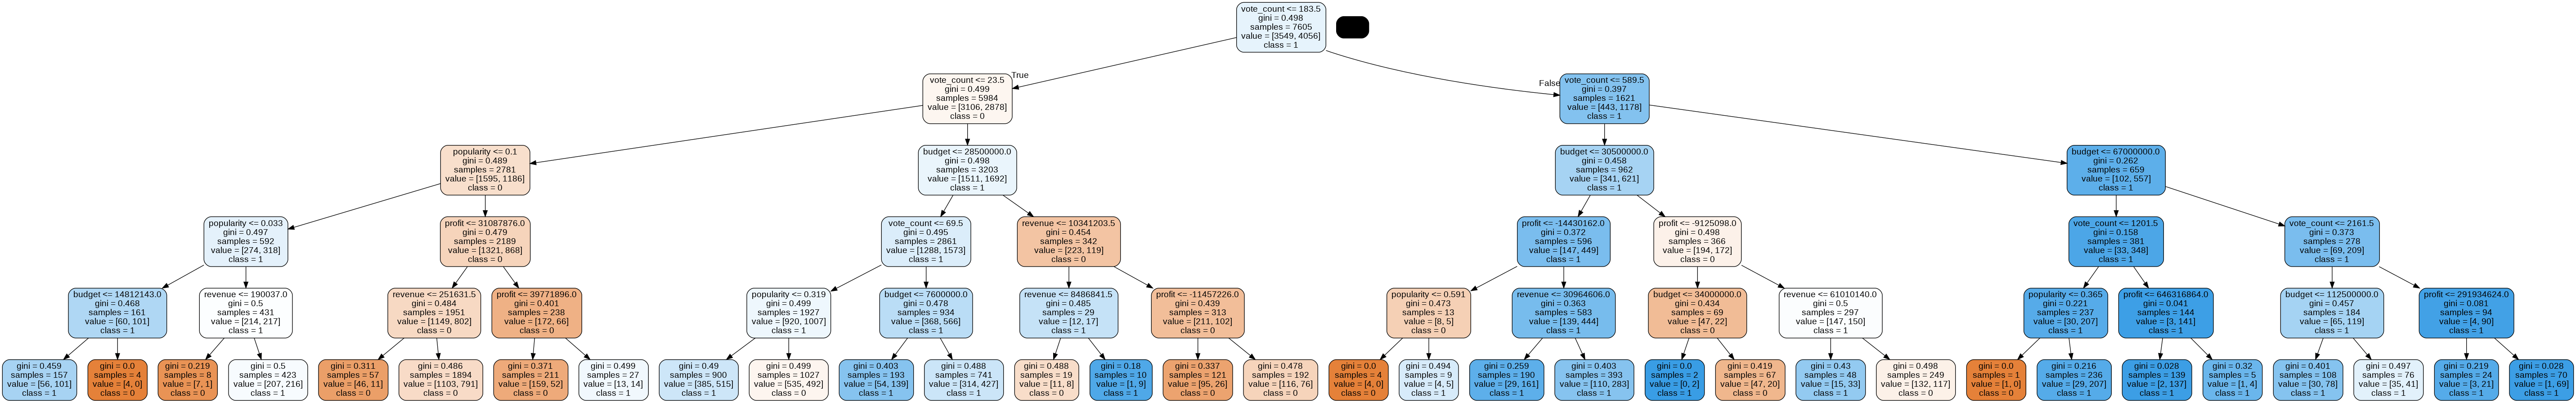

In [ ]:
# Vizualizacija stabla odluke
dot_data = StringIO()
export_graphviz(tree_decision_cf, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = X_train.columns,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree_clf.png')
Image(graph.create_png())

In [ ]:
y_pred_test = tree_decision_cf.predict(X_test)
print('Prvih 10 predviđanja:', y_pred_test[:10])

Prvih 10 predviđanja: [1 0 1 1 0 0 1 1 1 1]


In [ ]:
print("Točnost na skupu za testiranje: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred_test) * 100))

Točnost na skupu za testiranje: 59.66%


In [ ]:
print("Točnost na skupu za treniranje: {:.2f}%".format(metrics.accuracy_score(y_train, tree_decision_cf.predict(X_train)) * 100))

Točnost na skupu za treniranje: 62.09%


>Točnost na skupu za testiranje je oko `59%`, što znači da nisu dobro izučeni podaci, odnosno `59%` podataka je dobro klasificirano. Točnosti na skupu za treniranje je nešto veća što znači da je `62%` podataka dobro klasificirano.

> Matrica kofuzije provjeriti će se na kojim primjerima iz skupa za testiranje je klasifikator najviše griješio.

In [ ]:
# Funkcija za matricu konfuzije
def eval_matrica_konfuzije(y, y_pred):
  plt.figure(figsize=(5,5))
  matrica_konfuzije = metrics.confusion_matrix(y, y_pred)
  sns.heatmap(matrica_konfuzije, annot = True, 
            fmt='d', cbar=False)
  plt.ylabel('Točna vrijednost')
  plt.xlabel('Predviđena vrijednost')
  plt.show()  

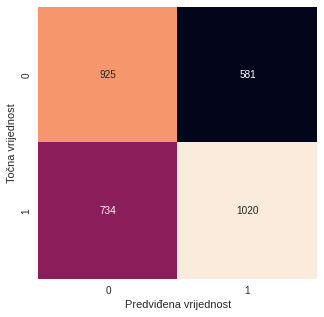

In [ ]:
# Matrica konfuzije točnih i predviđenih vrijednosti
eval_matrica_konfuzije(y_test, y_pred_test)

> Točno su klasificirani podaci na dijagonali, ostali su netočno klasificirani. Može se vidjeti da je model predvidio `734` filmova pogrešno, odnosno da je kod njih rating filmova manji od 5.5, odnosno da su ti filmovi loši. Isto tako je predvidio još `581` filmova pogrešno, odnosno da je rating tih filmova veći od 5.5.

<h5>7.1.2 Slučajne šume</h5>

<hr>

In [ ]:
# Definiranje modela i fittanje podataka
model = RandomForestClassifier(n_estimators=15, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=0)

In [ ]:
# Predvidanje vrijednosti
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
print("Točnost na skupu za testiranje: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred_test) * 100))

Točnost na skupu za testiranje: 58.31%


> Kod klasifikacije korištenjem slučajnih šuma, vidimo da je točnost na skupu za testiranje oko `58%`, što znači da malo bolje izučeni podaci, odnosno `58%` podataka je dobro klasificirano.

> U usporedbi sa stablom odluke, vidi se da je točnost manja za `1%`, što znači da je ovaj klasifikator nešto lošije klasificirao podatke.

<h5>7.1.3 Model neuronske mreže</h5>

<hr>

> Potrebno je skalirati podatke da imaju očekivanu vrijednost 0 i standardnu devijaciju 1 zbog numeričke stabilnosti neuronske mreže.

In [ ]:
# Skaliranje podataka
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Definiranje modela
model = Sequential()
model.add(Dense(128, input_dim=5, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               768       
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


> Neuronska mreža uči **težine**, odnosno gore navedenih `8256` parametara. Dakle, računa predviđanja za podatke iz skupa za treniranje, te predviđanja uspoređuje s točnim vrijednostima i računajući **gubitak**. Ponavljaju se navedeni koraci kako bi se težine ažurirale sve dok se ne zadovolji kriterij zaustavljanja.

In [ ]:
# Treniranje neuronske mreže
br_epoha = 70
batch_s = 32
history = model.fit(X_train_scaled, y_train,
                    epochs = br_epoha,
                    batch_size = batch_s,
                    verbose = 1)

In [ ]:
loss, acc = model.evaluate(X_test_scaled, y_test)
print('Gubitak: {:.4f}\nTočnost: {:.2f}%'.format(loss, acc*100))

102/102 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.6043
Gubitak: 0.6437
Točnost: 60.43%


> Može se vidjeti da je model neuronske mreže slično klasificirao podatke po točnosti od oko `60%` kao i klasifikatori stablo odluke i slučajne šume.

<h4>7.2 Regresija</h4>

<hr>


In [ ]:
# Podjela značajki na one za treniranje i za predviđanje
X_reg = movies_df[['vote_average', 'budget', 'revenue', 'vote_count', 'profit']]
y_reg = movies_df['popularity']


X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=2)

<h5>7.2.1 Stablo odluke</h5>

<hr>

> Želi se na temelju dostupnih značajki filmova utvrditi vrijednost `popularity`.



In [ ]:
# Definiranje modela i fittanje podataka
tree_decision_rg = DecisionTreeRegressor(max_depth=5) 
tree_decision_rg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

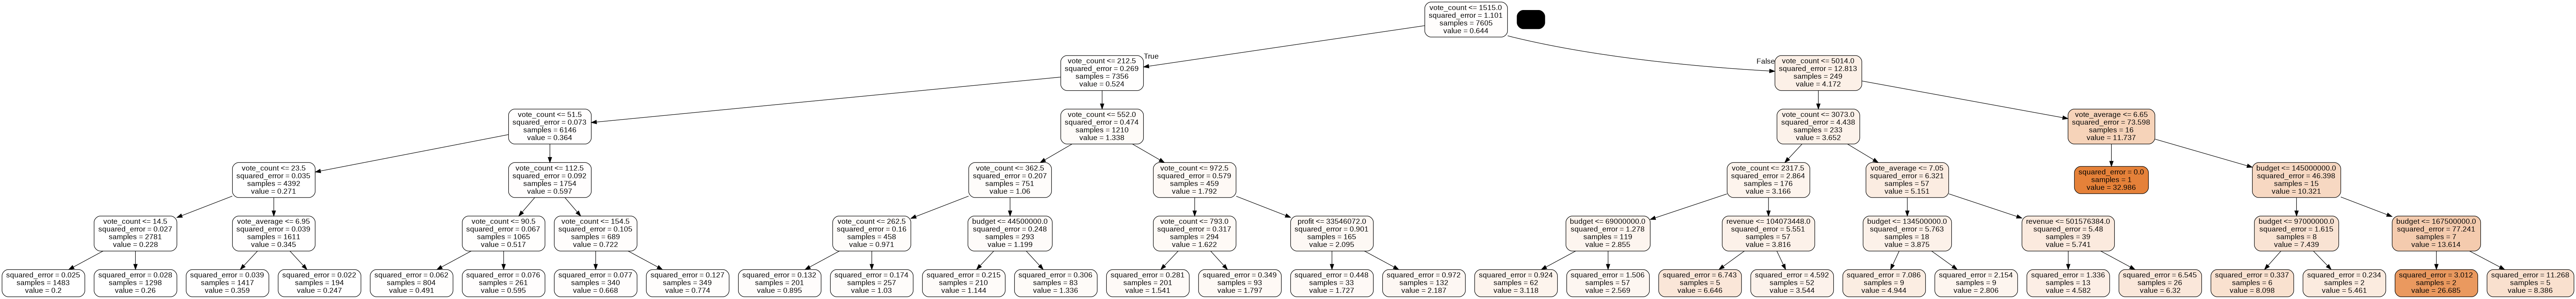

In [ ]:
# Vizualizacija stabla odluke
dot_data = StringIO()
export_graphviz(tree_decision_rg, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree_reg.png')
Image(graph.create_png())

In [ ]:
y_pred_test = tree_decision_rg.predict(X_test)
print('Prvih 10 predviđanja:', np.round(y_pred_test[:10],3))

Prvih 10 predviđanja: [0.359 0.2   0.2   0.247 0.2   0.2   3.118 0.26  1.03  0.359]


In [ ]:
# Funkcija ispisa metrika
def evaluate_regression(y, y_pred):
  print('MAE: {:.3f}'.format(metrics.mean_absolute_error(y, y_pred)))
  print('MSE: {:.3f}'.format(metrics.mean_squared_error(y, y_pred)))
  print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y, y_pred))))

In [ ]:
print('Evaluacija na skupu za testiranje:\n' + '-'*50)
evaluate_regression(y_test, y_pred_test)

Evaluacija na skupu za testiranje:
--------------------------------------------------
MAE: 0.249
MSE: 0.509
RMSE: 0.713


> Na skupu za testiranje:

* `MAE = 0.2` implicira da je, u prosjeku razlika predviđene od stvarne vrijednosti oko `0.2` (npr. stvarna vrijednost je 6.7, a prognoza je 6.9 ili stvarna vrijednost je 6.9, a prognoza je 6.7).

* MSE predstavlja koliko je skup točaka blizu regresijskoj liniji. Što je manji MSE, znači da je model bolji. U ovom slučaju je `MSE = 0.5`, što znači da postoji greška.

* RMSE pokazuje da li sve točke leže na regresijskom pravcu. Kada je RMSE jednak nuli znači da sve točke leže na pravcu i da su predviđene i stvarne vrijednosti jednake. U ovom slučaju, `RMSE = 0.7`, što znači da postoje greške, odnosno točake koje ne leže na pravcu.

In [ ]:
# Funkcija za vizualizaciju scatter plota
def scatter_eval(y, y_pred):
  plt.figure(figsize=(10,6))
  sns.scatterplot(x = y, y = y_pred)
  plt.xlabel('Točno', fontsize = 12)
  plt.ylabel('Predviđeno', fontsize = 12)
  # pravac f(x) = x
  plt.plot(y, y, color='salmon')
  plt.show()

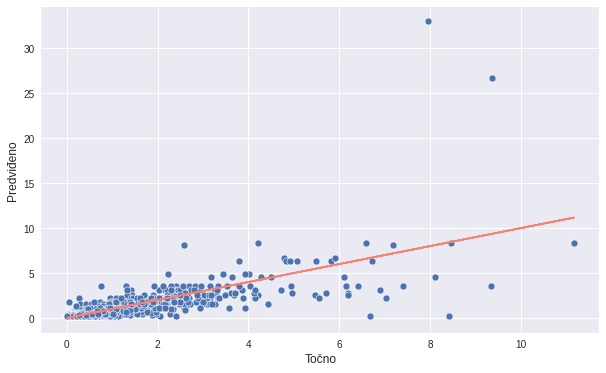

In [ ]:
# Graf predviđenih i točnih vrijednosti iz skupa za testiranje
scatter_eval(y_test, y_pred_test)

In [ ]:
# Predviđenje vrijednosti
y_pred_train = tree_decision_rg.predict(X_train)

print('Evaluacija na skupu za treniranje:\n' + '-'*50)
evaluate_regression(y_train, y_pred_train)

Evaluacija na skupu za treniranje:
--------------------------------------------------
MAE: 0.222
MSE: 0.184
RMSE: 0.429


> Na skupu za treniranje:

* `MAE = 0.2` slično kao i kod skupa za testiranja što znači da postoji razlika između stvarne i predviđene vrijednosti.

* `MSE = 0.18` što znači da postoji greška kod regresijske linije i skupa točaka.

* `RMSE = 0.4` pokazuje da postoje točke koje ne leže na pravcu.

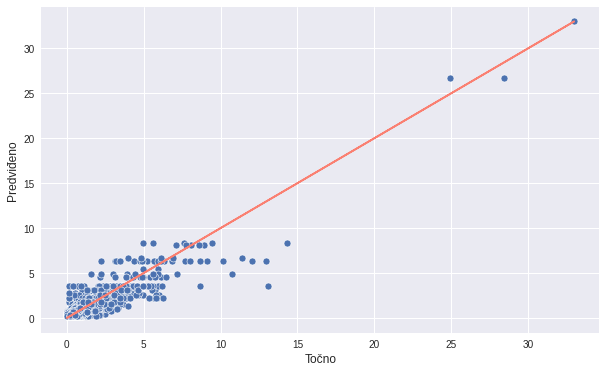

In [ ]:
# Graf predviđenih i točnih vrijednosti iz skupa za treniranje
scatter_eval(y_train, y_pred_train)

<h5>7.2.2 Slučajne šume</h5>

<hr>


In [ ]:
# Definiranje modela i fittanje podataka
model = RandomForestRegressor(n_estimators=15, random_state=0)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

In [ ]:
print('Evaluacija na skupu za testiranje:\n' + '-'*50)
evaluate_regression(y_test, y_pred_test)

Evaluacija na skupu za testiranje:
--------------------------------------------------
MAE: 0.259
MSE: 0.295
RMSE: 0.543


> Kod skupa za testiranje:

* `MAE = 0.26`, slično kao i kod stabla odluke, odnosno razlika između predviđenih i stvarnih vrijednosti je oko 0.2.

* `MSE = 0.29`, u usporedbi sa stablom odluke je slično, što znači da je manje točaka bliže regresijskom pravcu.

* `RMSE = 0.54`, u usporedbi sa stablom odluke je za oko 0.2 manja, što znači da više točaka leži na pravcu, odnosno da ima više predviđenih i stvarnih vrijednosti koje su jednake.

> Slijedi da je po manjim greškama bolji regresor gdje se koriste slučajne šume, u kojem su greške malo manje.

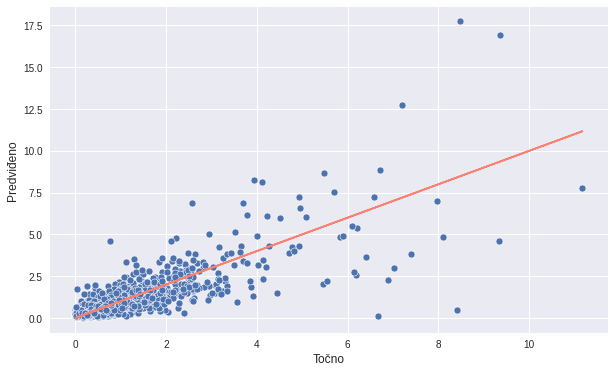

In [ ]:
# Graf predviđenih i točnih vrijednosti iz skupa za testiranje
scatter_eval(y_test, y_pred_test)

In [ ]:
print('Evaluacija na skupu za treniranje:\n' + '-'*50)
evaluate_regression(y_train, model.predict(X_train))

Evaluacija na skupu za treniranje:
--------------------------------------------------
MAE: 0.118
MSE: 0.096
RMSE: 0.310


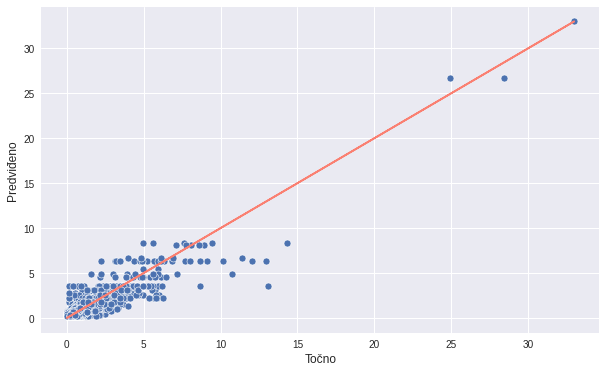

In [ ]:
# Graf predviđenih i točnih vrijednosti iz skupa za treniranje
scatter_eval(y_train, y_pred_train)

> Na skupu za treniranje:

* `MAE = 0.1` slično kao i kod skupa za testiranja što znači da postoji razlika između stvarne i predviđene vrijednosti.

* `MSE = 0.1` što znači da postoji greška kod regresijske linije i skupa točaka.

* `RMSE = 0.3` pokazuje da postoje točke koje ne leže na pravcu.

> Kod skupa za treniranje, postoje greške ali nešto manje nego kod treniranja stabla odluke. U oba slučaja podaci nisu dobro istrenirane, odnosno postoje točke koje ne leže na pravcu, pa se ne može se sigurnošću reći da je jedan od regresora bolji. Zaključak je taj da bi poraditi na podacima i uzeti kvalitetne značajke za testiranje.

####<h4> 8.&emsp;Analiza mreže glumaca/glumica koji su surađivali </h4>

<hr>

Ovaj skup podataka također na neki način predstavlja mrežu suradnje glumaca po svakom filmu. U ovom poglavlju razmatrit će se mjere centralnosti mreže koje precizno određuju najvažnije čvorove u mreži.

> Postoje četiri dobro poznate mjere centralnosti: **degree centrality**, **betweenness centrality**, **closeness centrality** i **eigenvector centrality**.

Glavna ideja koja se želi naglasiti je da analitička korisnost svakog od njih uvelike ovisi o kontekstu mreže. Ne želi se odrediti da je jedna mjera centralnosti bolja od druge – samo da jedana od njih može bolje poslužiti ovisno o istraživačkim ciljevima.

In [ ]:
# Biblioteka za rad s grafovima/mrezama
import networkx as nx

In [ ]:
# Funkcija koja stvara kombinacije
from itertools import combinations

def cast_list(data):
  return list(combinations(data, 2))

In [ ]:
# Uzimaju se uloga prvih 1000 filmova iz skupa podataka
movies_cast = split_data(movies_df['cast']).values.tolist()[:1000]

In [ ]:
# U listu se spremaju sve kombinacije
all_cast = []
for cast in movies_cast:
  list_cast = cast_list(cast)
  all_cast.append(list_cast)

In [ ]:
# U txt datoteku zapisuju se sve kombinacije glumaca

with open('cast.txt', 'w') as f:
  f.write('x'+'/y\n')
  for i in all_cast:
    for j in i:
      if(str(j[0]) != 'None' and str(j[1]) != 'None'):
        text = str(j[0]) +'/' + str(j[1]) + '\n'
        f.write(text)

In [ ]:
# Kreira se dataframe
cast_df = pd.read_csv('cast.txt', delimiter = "/")

In [ ]:
# Provjera NaN vrijednosti
cast_df.isna().sum()

x    80
y    80
dtype: int64

In [ ]:
# Provjera duplikata
cast_df.duplicated().sum()

157

In [ ]:
# Brisanje NaN i duplikata
cast_df = cast_df.dropna().drop_duplicates()

In [ ]:
# Prikaz dataframea nakon promjena
cast_df.head()

,x,y
0,Chris Pratt,Bryce Dallas Howard
1,Chris Pratt,Irrfan Khan
2,Chris Pratt,Vincent D'Onofrio
3,Chris Pratt,Nick Robinson
4,Bryce Dallas Howard,Irrfan Khan


In [ ]:
# Kreiranje mreže
cast_nx = nx.from_pandas_edgelist(cast_df, source='x', target='y')

In [ ]:
# Broj čvorova i bridova
cast_nodes = cast_nx.order()
cast_edges = cast_nx.size()
print(f'Broj čvorova/glumaca: {cast_nodes}')
print(f'Broj bridova/suradnji među glumcima: {cast_edges}')

Broj čvorova/glumaca: 3294
Broj bridova/suradnji među glumcima: 9386


In [ ]:
# Stupnjevi svakog čvora u mreži
degrees = dict(cast_nx.degree())

In [ ]:
print('Čvor s najmanjim stupnjem je: %s, %s' % (min(degrees, key=degrees.get), degrees[min(degrees, key = degrees.get)]))
print('Čvor s najvećim stupnjem je: %s, %s' % (max(degrees, key=degrees.get), degrees[max(degrees, key = degrees.get)]))

Čvor s najmanjim stupnjem je: Napua Greig, 1
Čvor s najvećim stupnjem je: Ben Kingsley, 36


<h4> 8.1 Degree centrality</h4>

<hr>

In [ ]:
# Čvorovi s najvećim stupnjem
degrees = dict(cast_nx.degree())
sorted(degrees.items(), key=lambda item: item[1], reverse=True)[:5]

[('Ben Kingsley', 36),
 ('James Franco', 35),
 ('Samuel L. Jackson', 32),
 ('James Marsden', 32),
 ('Kristen Wiig', 28)]

> Iz stupnjeva čvora slijedi da je čvor (glumac) Ben Kingsley "_najpopularniji_", stupnja 36 odnosno povezan je s najvećim brojem čvorova (glumaca), u odnosu na ostale čvorove. Dakle, lik Ben Kingsley je najviše povezan s drugim likovima, odnosno najviše je surađivao s drugim likovima. Slijede čvorovi (glumci) James Franco sa stupnjem 35, Samuel L. Jackson i James Marsden sa stupnjem 32, zatim glumica Kristen Wiig sa stupnjem 28 itd.

In [ ]:
degree_centrality = nx.degree_centrality(cast_nx)
sorted(nx.degree_centrality(cast_nx).items(), key=lambda item: item[1], reverse=True)[:5]

[('Ben Kingsley', 0.010932280595201944),
 ('James Franco', 0.010628606134224113),
 ('Samuel L. Jackson', 0.009717582751290617),
 ('James Marsden', 0.009717582751290617),
 ('Kristen Wiig', 0.00850288490737929)]

> Za _"najpopularniji"_ čvor Ben Kingsley s maksimalnim stupnjem 36 slijedi da je mjera stupnja čvora 36/n-1 gdje je n=3294, tj. 36/3294-1 što iznosi oko 0.0109, a znači da ima najviše direktnih veza s drugim čvorovima.

> Dalje, za čvor James Franco maksimalnog stupnja 35, slijedi da je mjera stupnja čvora 35/3293 tj.oko  0.0106. Za čvorove Samuel L. Jackson i James Marsden Robb maksimalnog stupnja 32, slijedi da je 32/3293 tj. 0.0097, itd. 

> Svaki idući čvor ima manji iznos mjere stupnja čvora odnosno povezan je s manje veza među čvorovima.

<h4> 8.2 Closeness centrality</h4>

<hr>



In [ ]:
closeness = nx.closeness_centrality(cast_nx)
sorted(closeness.items(), key = lambda x: x[1], reverse = True)[:5]

[('James Marsden', 0.1872774549588101),
 ('Rachel McAdams', 0.18471004084717915),
 ('James Franco', 0.18430577286546065),
 ('Julianne Moore', 0.1823896634659497),
 ('Liam Neeson', 0.18236991363774546)]

> Kod closeness_centrality mjere, čvor James Marsden ima najveći iznos mjere od 0.187, što znači da je iz njega najbrže doći do drugih čvorova, tj. iz tog čvora slijede najkraći putevi do svih ostalih čvorova. Kod ove mjere, došlo je do promjene poretka čvorova u odnosu na mjeru stupnja čvora. Vidi se da su idući čvorovi Rachel McAdams i James Franco sa sličnim iznosima, oko 0.184. Zatim slijede čvorovi s manjim iznosima mjere.

<h4>8.3 Betweenness centrality</h4>

<hr>


In [ ]:
betweenness = nx.betweenness_centrality(cast_nx)
sorted(betweenness.items(), key = lambda x: x[1], reverse = True)[:5]

[('Rachel McAdams', 0.01816881355046585),
 ('James Franco', 0.01805388103781104),
 ('Willem Dafoe', 0.016715131624596983),
 ('Liam Neeson', 0.01653311054550488),
 ('Ben Kingsley', 0.01570672167138936)]

> Kod _betweenness centrality_ mjere, čvor Rachel McAdams ima najveći iznos mjere koji iznosi 0.018. Dakle, ovaj čvor može najviše čvorova grafa povezati s drugim čvorovima. Idući čvor je James Franco sa sličnim iznosom mjere, dok stali čvorovi imaju vrijednost mjere manju od 0.18. Idući čvorovi slijede Willem Dafoe i Liam Neeson s vrijednostima oko 0.016.
Može se primjeniti da se poredak čvorova i kod ove mjere promjenio.

<h4>8.4 Eigenvector centrality</h4>

<hr>


In [ ]:
eigencentrality = nx.eigenvector_centrality(cast_nx)
sorted(eigencentrality.items(), key = lambda x: x[1], reverse = True)[:10]

[('Alicia Vikander', 0.13654817824448925),
 ('James Marsden', 0.12526471667572425),
 ('James Franco', 0.12505180156135978),
 ('Sienna Miller', 0.12311616657587025),
 ('Ben Kingsley', 0.1224569425256557),
 ('Matthias Schoenaerts', 0.12023056274700811),
 ('Julianne Moore', 0.11265996902546475),
 ('Kristen Wiig', 0.1098000016496202),
 ('Bradley Cooper', 0.10909358633788716),
 ('Scoot McNairy', 0.1075534346184709)]

> Kod _eigenvector centrality_ mjere, čvor Alicia Vikander ima najveći iznos mjere oko 0.13, što znači da je čvor najbolje povezan od ostalih čvorova. Idući čvorovi, James Marsden i James Franco imaju manji iznos oko 0.12, što govori da čvorovi nisu dovoljno dobro povezani. Zatim slijede čvorovi s iznosima mjere manjim od 0.12.

> Iz dobivenih rezultata za svaku mjeru, može se vidjeti da se ističe nekoliko glumaca kao što su James Franco, James Marsden i Ben Kingsley. Dakle, ovi glumci su _"najbitniji"_ u filmovima, odnosno oni najčešće surađuju s drugim glumcima te su time glumili u najviše filmova.

####<h4> 9.&emsp;Zaključak </h4>

<hr>

<p style='text-align: justify'>Prije analize skupa podataka, potrebno je obratiti pažnju na uzeti skup podataka nad kojim se želi vršiti analiza. U većini slučajeva nad podacima je potrebno napraviti predobradu i čišćenje. Kao što se moglo vidjeti u ovom skupu podataka, postojali su nepotpuni ili dupli zapisi te je bilo potrebno definirati tipove podataka koji su vrlo bitni za daljnju obradu, npr. ako se žele napraviti neke matematičke operacije. Kod eksplorativne analize i vizualizacije podataka, dobili su se odgovori na postavljena pitanja. Doznalo se da je u ovom skupu podataka kroz godine 'drama' bila najpopularniji žanr, a slijedila ga je 'komedija'. Zatim, najveći ukupni broj filmova je objavljen 2014. godine, a 2009. godine je snimljen najprofitabilniji film Avatar. 

Pomoću tekstualne analize mogli su se odrediti 'dublji' detalji o filmovima, npr. ispisom najučestalijih riječi kratkih sadržaja svih filmova zaključile su se pojedinosti o radnjama filmova, a među ključnim riječima su 'svijet' i 'ljubav' što se može povezati i s najpopularnijim žanrom 'drama'. Kod klasifikacijske i regresijske analize, zaključilo se da je skup podataka potrebno ažurirati konkretnijim značajkama i upotpuniti postojeće kako bi se podaci uspješnije istrenirali, a poslije preciznije predviđali. Točnost predviđanja modelima dosezala je 60%, a tim rezultatom se ne može reći da je cilj predviđanja ispunjen. 

Naposljetku, analizirala se mreža surađivanja među glumcima ovisno u kojim su filmovima glumili. Zaključuje se da postoji nekoliko mjera centralnosti koje se koriste za analizu mreža. Koje je potrebno koristiti i kada ovisi o tome koji se istraživački ciljevi žele postići nad promatranom mrežom.</p>


In [ ]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/UPZ_seminar/UPZ_Seminar_Mravak.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/UPZ_seminar/UPZ_Seminar_Mravak.ipynb to html
[NbConvertApp] Writing 3715290 bytes to /content/drive/MyDrive/UPZ_seminar/UPZ_Seminar_Mravak.html
